# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [4]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Разделите данные на две части - данные для моделирования (80%) и отложенную выборку (20%). Убедитесь, что распределение целевой переменной (`G3`) одинаково в обоих частях.  
  __NB__: Отложенную выборку нужно использовать только для финальной оценки качества модели. Обучение и кросс-валидацию следует проводить на данных для моделирования.  
* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

### Решение

**1)** Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.

In [6]:
cdata = data.copy()

**!** Для удобства работы с некоторыми категориальными признаками заменяю "yes/no" на 1/0.

In [7]:
bool_columns = ["schoolsup", "famsup", "paid", "activities", "nursery", "higher","internet", "romantic","cheating"]
for column in bool_columns:
    cdata.loc[:, column].replace("no", 0, inplace=True)
    cdata.loc[:, column].replace("yes", 1, inplace=True)

cdata.head()

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,0,0,0,0,1,1,1,0.0,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,0,0,0,1,0,1,1,0.0,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,0,0,0,0,0,1,1,0.0,4.0,4,5,3.0,5.0,5,0,1.0,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,0,0,0,1,1,1,1,0.0,4.0,4,3,1.0,1.0,3,4,0.0,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,0,1,0,0,1,1,0,NaN,4.0,3,2,1.0,4.0,5,2,1.0,12,13,13


**!** Смотрим на уникальные элементы каждой колонки и сравниваем с информацией в "students_data_features.csv", чтобы выявить ошибки

In [8]:
for column in cdata.columns:
    print(f"{column}: unique data --> {cdata[column].unique()}")

ID: unique data --> [100097 101021 102965 ... 998425 999143 999194]
Subject: unique data --> ['Por' 'Math']
school: unique data --> ['GP' 'MS']
sex: unique data --> ['F' 'M' 'm']
age: unique data --> [16 17 18 15 19 21 20 22]
address: unique data --> ['U' 'R']
famsize: unique data --> ['GT3' 'LE3']
Pstatus: unique data --> ['A' 'T' 't']
Medu: unique data --> ['3' '1' '2' '4' '0' 'o']
Fedu: unique data --> ['4' '2' '3' '1' 'o' '0']
Mjob: unique data --> ['services' 'other' 'health' 'at_home' 'teacher' 'at-home']
Fjob: unique data --> ['other' 'services' 'health' 'at-home' 'teacher' 'at_home']
reason: unique data --> ['course' 'home' 'reputation' 'other']
guardian: unique data --> ['father' 'mother' 'other' 'futher']
traveltime: unique data --> [1 2 3 4]
studytime: unique data --> [1 2 4 3]
failures: unique data --> [0 2 1 3]
schoolsup: unique data --> [0 1]
famsup: unique data --> [0 1]
paid: unique data --> [0 1]
activities: unique data --> [0 1]
nursery: unique data --> [1 0]
higher: 

**!** Опечатки и ошибки были выявлены в данных столбцах:

In [9]:
spoild_data = ["sex", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "guardian"]

**Исправляем опечатки:**

In [10]:
cdata.loc[:, "sex"].replace("m", "M", inplace=True)
cdata.loc[:, "Pstatus"].replace("t", "T", inplace=True)
cdata.loc[:, "guardian"].replace("futher", "father", inplace=True)
cdata.replace("at-home", "at_home", inplace=True)
cdata.replace("o", "0", inplace=True)

**Исправленные данные:**

In [11]:
for column in  cdata.columns:
    print(f"{column}: unique data --> {cdata[column].unique()}")

ID: unique data --> [100097 101021 102965 ... 998425 999143 999194]
Subject: unique data --> ['Por' 'Math']
school: unique data --> ['GP' 'MS']
sex: unique data --> ['F' 'M']
age: unique data --> [16 17 18 15 19 21 20 22]
address: unique data --> ['U' 'R']
famsize: unique data --> ['GT3' 'LE3']
Pstatus: unique data --> ['A' 'T']
Medu: unique data --> ['3' '1' '2' '4' '0']
Fedu: unique data --> ['4' '2' '3' '1' '0']
Mjob: unique data --> ['services' 'other' 'health' 'at_home' 'teacher']
Fjob: unique data --> ['other' 'services' 'health' 'at_home' 'teacher']
reason: unique data --> ['course' 'home' 'reputation' 'other']
guardian: unique data --> ['father' 'mother' 'other']
traveltime: unique data --> [1 2 3 4]
studytime: unique data --> [1 2 4 3]
failures: unique data --> [0 2 1 3]
schoolsup: unique data --> [0 1]
famsup: unique data --> [0 1]
paid: unique data --> [0 1]
activities: unique data --> [0 1]
nursery: unique data --> [1 0]
higher: unique data --> [1 0]
internet: unique data -

**Поиск и обработка пропущенных значений:**

In [12]:
columns_nan = list()
if cdata.isnull().values.any():
    sum_all_nan = cdata.isnull().sum().sum()  # how many (total)
    print("Total amount of NaN: ", sum_all_nan, '\n')
    print('"Characteristic" : "Amount of Nan"')
    for column in cdata.columns:
        if cdata[column].isnull().values.any():
            columns_nan.append(column)
            column_sum = cdata[column].isnull().sum().sum()
            print(f'{column} : {column_sum}') # where + amount

Total amount of NaN:  740 

"Characteristic" : "Amount of Nan"
romantic : 10
famrel : 10
Dalc : 10
Walc : 10
cheating : 700


По признаку **cheating** очень много пропусков(700 из 1044), таким образом его нельзя заменить средним и не потерять в точности. Но можно оставить информацию о том, пропущенно значение или нет - потом посмотреть, можно ли будет использовать данный признак при обучении.

In [13]:
cdata['is_cheating_missed'] = cdata['cheating'].isnull().astype('int64')
cdata.drop('cheating', axis=1, inplace=True)
cdata

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,is_cheating_missed
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,0,0,0,0,1,1,1,0.0,3.0,2,1,1.0,4.0,5,12,15,13,14,1
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,0,0,0,1,0,1,1,0.0,5.0,3,4,1.0,3.0,3,2,17,18,17,1
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,0,0,0,0,0,1,1,0.0,4.0,4,5,3.0,5.0,5,0,9,8,10,0
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,0,0,0,1,1,1,1,0.0,4.0,4,3,1.0,1.0,3,4,14,15,16,0
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,0,1,0,0,1,1,0,NaN,4.0,3,2,1.0,4.0,5,2,12,13,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,997832,Math,GP,F,15,R,GT3,T,3,3,services,services,reputation,other,2,3,2,0,1,1,1,1,1,1,1.0,4.0,2,1,2.0,3.0,3,8,10,10,10,1
1040,997897,Por,GP,M,15,R,GT3,T,2,1,health,services,reputation,mother,1,2,0,0,0,0,1,1,1,1,1.0,5.0,4,2,1.0,1.0,5,4,10,9,10,0
1041,998425,Por,MS,F,16,R,LE3,T,1,1,at_home,other,course,father,3,2,0,0,1,0,0,1,1,0,0.0,5.0,3,2,NaN,1.0,1,0,16,17,18,0
1042,999143,Por,GP,M,16,U,GT3,T,2,1,at_home,other,course,mother,4,1,0,0,0,0,0,1,1,0,0.0,3.0,2,1,1.0,1.0,2,4,9,9,11,1


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='is_cheating_missed', ylabel='count'>

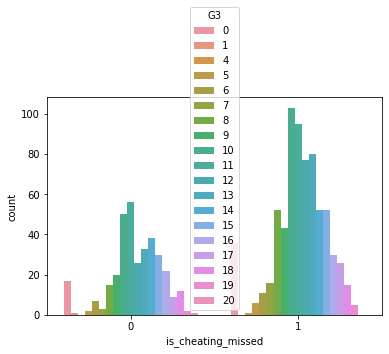

In [15]:
sns.countplot(x='is_cheating_missed', 
              hue='G3',
              data=cdata)

* Как видим из графика, там где мы знаем, что есть информация о списывании и где нет, графики не сильно много отличий имеют, распределния немного похожи, поэтомы смысла включать данную информацию в дальнейшее обучение я не вижу. Колонку **"is_cheating_missed"** можно убрать из таблицы.
* Колонки "romantic", "famrel", "Dalc", "Walc" содержат незначительное кол-во пропусков, которые можно заменить средним значением.

In [16]:
cdata.drop('is_cheating_missed', axis=1, inplace=True)
cdata

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,0,0,0,0,1,1,1,0.0,3.0,2,1,1.0,4.0,5,12,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,0,0,0,1,0,1,1,0.0,5.0,3,4,1.0,3.0,3,2,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,0,0,0,0,0,1,1,0.0,4.0,4,5,3.0,5.0,5,0,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,0,0,0,1,1,1,1,0.0,4.0,4,3,1.0,1.0,3,4,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,0,1,0,0,1,1,0,NaN,4.0,3,2,1.0,4.0,5,2,12,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,997832,Math,GP,F,15,R,GT3,T,3,3,services,services,reputation,other,2,3,2,0,1,1,1,1,1,1,1.0,4.0,2,1,2.0,3.0,3,8,10,10,10
1040,997897,Por,GP,M,15,R,GT3,T,2,1,health,services,reputation,mother,1,2,0,0,0,0,1,1,1,1,1.0,5.0,4,2,1.0,1.0,5,4,10,9,10
1041,998425,Por,MS,F,16,R,LE3,T,1,1,at_home,other,course,father,3,2,0,0,1,0,0,1,1,0,0.0,5.0,3,2,NaN,1.0,1,0,16,17,18
1042,999143,Por,GP,M,16,U,GT3,T,2,1,at_home,other,course,mother,4,1,0,0,0,0,0,1,1,0,0.0,3.0,2,1,1.0,1.0,2,4,9,9,11


In [17]:
columns_nan.remove("cheating")
for сolumn in columns_nan:
    print(cdata.groupby('sex')[сolumn].median())

sex
F    0.0
M    0.0
Name: romantic, dtype: float64
sex
F    4.0
M    4.0
Name: famrel, dtype: float64
sex
F    1.0
M    1.0
Name: Dalc, dtype: float64
sex
F    2.0
M    3.0
Name: Walc, dtype: float64


**!** Делаю проверку, отличается ли медианные значения для мужчин и женщин в столбцах, где есть пропуски.

* Отличия есть только в столбце **"Walc"**.
* Заменяю медианой пропуски в колонках **"romantic"**, **"famrel"**, **"Dalc"**, **"Walc"**.

In [18]:
cdata["Walc"].fillna(cdata.groupby("sex")["Walc"].transform('median'),  inplace=True)
columns_nan.remove("Walc")

In [19]:
for сolumn in columns_nan:
    avarage = cdata.loc[:, сolumn].median(skipna = True)
    cdata.loc[:, сolumn].fillna(avarage, inplace=True)
    print(f"{сolumn}: average value --> {avarage}")

romantic: average value --> 0.0
famrel: average value --> 4.0
Dalc: average value --> 1.0


**!** меняю тип некоторых значений для большего удобства, после устранения пустых значений в колонках.

In [20]:
cdata['romantic'] = cdata.romantic.astype('int64')
cdata['Dalc'] = cdata.Dalc.astype('int64')
cdata['Walc'] = cdata.Walc.astype('int64')
cdata['famrel'] = cdata.famrel.astype('int64')
cdata.dtypes

ID             int64
Subject       object
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu          object
Fedu          object
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup      int64
famsup         int64
paid           int64
activities     int64
nursery        int64
higher         int64
internet       int64
romantic       int64
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

### Приведение к числовому виду:

In [21]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

**Перевод бинарных признаков:**

In [22]:
sex_enc = OrdinalEncoder()
sex_enc.fit(cdata[['sex']])
sex_bin = sex_enc.transform(cdata[['sex']])
sex_bin[:3]

array([[0.],
       [0.],
       [1.]])

In [23]:
address_enc = OrdinalEncoder()
address_enc.fit(cdata[['address']])
address_bin = address_enc.transform(cdata[['address']])
address_bin[:3]

array([[1.],
       [1.],
       [1.]])

In [24]:
subject_enc = OrdinalEncoder()
subject_enc.fit(cdata[['Subject']])
subject_bin = subject_enc.transform(cdata[['Subject']])
subject_bin[:3]

array([[1.],
       [1.],
       [1.]])

In [25]:
school_enc = OrdinalEncoder()
school_enc.fit(cdata[['school']])
school_bin = school_enc.transform(cdata[['school']])
school_bin[:3]

array([[0.],
       [0.],
       [0.]])

In [26]:
famsize_enc = OrdinalEncoder()
famsize_enc.fit(cdata[['famsize']])
famsize_bin = famsize_enc.transform(cdata[['famsize']])
famsize_bin[:3]

array([[0.],
       [0.],
       [1.]])

In [27]:
Pstatus_enc = OrdinalEncoder()
Pstatus_enc.fit(cdata[['Pstatus']])
Pstatus_bin = Pstatus_enc.transform(cdata[['Pstatus']])
Pstatus_bin[:3]

array([[0.],
       [1.],
       [1.]])

* Теперь преобразовываю оставшиеся категориальные признаки **Mjob**, **Fjob**, **reason** и **guardian**. Так как они принимают более 2-х уникальных значений, для них используется другой метод - One Hot Encoding.

In [28]:
ct = ColumnTransformer(
    [
        ('Mjob', OneHotEncoder(sparse=False, categories='auto'), ['Mjob']), 
        ('Fjob', OneHotEncoder(sparse=False), ['Fjob']), 
        ('reason', OneHotEncoder(sparse=False), ['reason']),
        ('guardian', OneHotEncoder(sparse=False), ['guardian'])
    ],
    remainder='drop'
)
ct.fit(cdata)

ColumnTransformer(transformers=[('Mjob', OneHotEncoder(sparse=False), ['Mjob']),
                                ('Fjob', OneHotEncoder(sparse=False), ['Fjob']),
                                ('reason', OneHotEncoder(sparse=False),
                                 ['reason']),
                                ('guardian', OneHotEncoder(sparse=False),
                                 ['guardian'])])

In [29]:
ct.get_feature_names()

['Mjob__x0_at_home',
 'Mjob__x0_health',
 'Mjob__x0_other',
 'Mjob__x0_services',
 'Mjob__x0_teacher',
 'Fjob__x0_at_home',
 'Fjob__x0_health',
 'Fjob__x0_other',
 'Fjob__x0_services',
 'Fjob__x0_teacher',
 'reason__x0_course',
 'reason__x0_home',
 'reason__x0_other',
 'reason__x0_reputation',
 'guardian__x0_father',
 'guardian__x0_mother',
 'guardian__x0_other']

In [30]:
X = pd.DataFrame(ct.transform(cdata),
                 columns=[x.replace('_x0', '') for x in ct.get_feature_names()])
X.head(10)

,Mjob__at_home,Mjob__health,Mjob__other,Mjob__services,Mjob__teacher,Fjob__at_home,Fjob__health,Fjob__other,Fjob__services,Fjob__teacher,reason__course,reason__home,reason__other,reason__reputation,guardian__father,guardian__mother,guardian__other
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


**!** Добавляю новые столбцы, заменяю и удаляю старые:

In [31]:
cdata.drop(['sex', 'address', 'Subject', 'school', 'famsize',
            'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian'],
           axis=1, inplace=True)

cdata['is_male'] = sex_bin
cdata['is_address_U'] = address_bin
cdata['is_subject_por'] = subject_bin
cdata['is_school_MS'] = school_bin
cdata['is_famsize_small'] = famsize_bin
cdata['is_pstatus_t'] = Pstatus_bin

cdata = cdata.join(X)

cdata.head(10)

,ID,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,...,is_school_MS,is_famsize_small,is_pstatus_t,Mjob__at_home,Mjob__health,Mjob__other,Mjob__services,Mjob__teacher,Fjob__at_home,Fjob__health,Fjob__other,Fjob__services,Fjob__teacher,reason__course,reason__home,reason__other,reason__reputation,guardian__father,guardian__mother,guardian__other
0,100097,16,3,4,1,1,0,0,0,0,0,1,1,1,0,3,2,1,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,101021,17,3,2,1,2,0,0,0,0,1,0,1,1,0,5,3,4,1,3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,102965,16,1,2,2,1,2,0,0,0,0,0,1,1,0,4,4,5,3,5,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,102989,17,2,3,2,2,0,0,0,0,1,1,1,1,0,4,4,3,1,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,103131,16,1,1,2,1,0,0,1,0,0,1,1,0,0,4,3,2,1,4,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,103144,18,3,1,2,1,0,0,0,0,1,1,1,1,1,3,3,4,4,5,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,105257,18,1,1,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,107639,15,4,4,2,1,0,0,0,0,0,1,1,1,1,1,5,1,3,5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,107914,15,3,2,1,2,0,0,1,1,0,1,1,1,0,4,4,4,1,1,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,108089,16,3,4,3,2,0,0,0,0,0,0,1,0,0,3,4,5,1,2,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [32]:
cdata["Fedu"] = cdata["Fedu"].astype('int64')
cdata["Medu"] = cdata["Medu"].astype('int64')

**2)** **Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение.**

In [33]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1044 non-null   int64  
 1   age                 1044 non-null   int64  
 2   Medu                1044 non-null   int64  
 3   Fedu                1044 non-null   int64  
 4   traveltime          1044 non-null   int64  
 5   studytime           1044 non-null   int64  
 6   failures            1044 non-null   int64  
 7   schoolsup           1044 non-null   int64  
 8   famsup              1044 non-null   int64  
 9   paid                1044 non-null   int64  
 10  activities          1044 non-null   int64  
 11  nursery             1044 non-null   int64  
 12  higher              1044 non-null   int64  
 13  internet            1044 non-null   int64  
 14  romantic            1044 non-null   int64  
 15  famrel              1044 non-null   int64  
 16  freeti

<AxesSubplot:xlabel='famsup', ylabel='G3'>

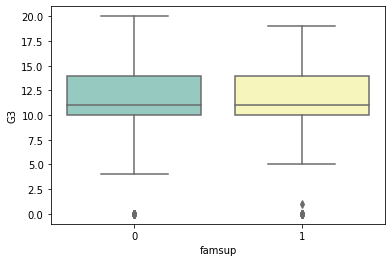

In [34]:
sns.boxplot(x='famsup',
           y='G3',
           data=cdata,
           palette="Set3")

<AxesSubplot:xlabel='guardian__mother', ylabel='G3'>

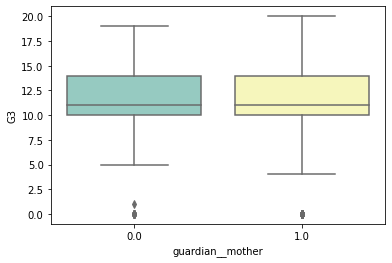

In [35]:
sns.boxplot(x='guardian__mother',
           y='G3',
           data=cdata,
           palette="Set3")

<AxesSubplot:xlabel='reason__other', ylabel='G3'>

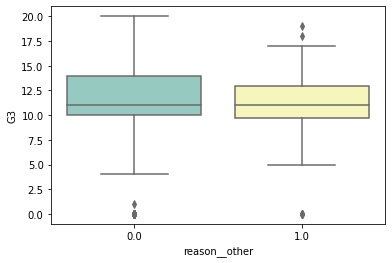

In [36]:
sns.boxplot(x='reason__other',
           y='G3',
           data=cdata,
           palette="Set3")

<AxesSubplot:xlabel='Fjob__at_home', ylabel='G3'>

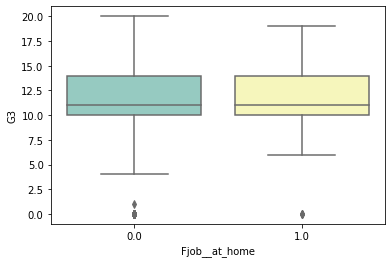

In [37]:
sns.boxplot(x='Fjob__at_home',
           y='G3',
           data=cdata,
           palette="Set3")

<AxesSubplot:xlabel='Mjob__other', ylabel='G3'>

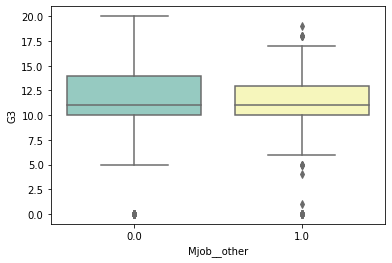

In [38]:
sns.boxplot(x='Mjob__other',
           y='G3',
           data=cdata,
           palette="Set3")

* **id** - уникален для каждого объекта, необходимо удалить из выборки.
* **famsup** -  на среднюю итоговую оценку не особо влияет помощь семьи с учебой, поэтому думаю, что можно исключить это признак.

In [39]:
cdata.drop(['ID', 'famsup'], axis=1, inplace=True) 
cdata

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,...,is_school_MS,is_famsize_small,is_pstatus_t,Mjob__at_home,Mjob__health,Mjob__other,Mjob__services,Mjob__teacher,Fjob__at_home,Fjob__health,Fjob__other,Fjob__services,Fjob__teacher,reason__course,reason__home,reason__other,reason__reputation,guardian__father,guardian__mother,guardian__other
0,16,3,4,1,1,0,0,0,0,1,1,1,0,3,2,1,1,4,5,12,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,17,3,2,1,2,0,0,0,1,0,1,1,0,5,3,4,1,3,3,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,16,1,2,2,1,2,0,0,0,0,1,1,0,4,4,5,3,5,5,0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,17,2,3,2,2,0,0,0,1,1,1,1,0,4,4,3,1,1,3,4,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,16,1,1,2,1,0,0,0,0,1,1,0,0,4,3,2,1,4,5,2,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,15,3,3,2,3,2,0,1,1,1,1,1,1,4,2,1,2,3,3,8,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1040,15,2,1,1,2,0,0,0,1,1,1,1,1,5,4,2,1,1,5,4,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1041,16,1,1,3,2,0,0,0,0,1,1,0,0,5,3,2,1,1,1,0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1042,16,2,1,4,1,0,0,0,0,1,1,0,0,3,2,1,1,1,2,4,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Выбросы

In [40]:
def get_outliers(data_frame=cdata) -> dict:
    fliers_info = dict()
    for label in data_frame.columns:
        if data_frame[label].dtypes == 'object':
            continue
        box_plot = plt.boxplot(data_frame[label], labels=[label])
        fliers_set = set(box_plot['fliers'][0].get_ydata())
        if (len(fliers_set)):
            fliers_info[label] = fliers_set
    plt.close()
    return fliers_info

In [41]:
print("Amount of numeric otliers:")
outl = get_outliers()
for key, val in outl.items():
    print(f'{key}: {len(val)}')

Amount of numeric otliers:
age: 1
traveltime: 1
studytime: 1
failures: 3
schoolsup: 1
paid: 1
nursery: 1
higher: 1
internet: 1
famrel: 2
freetime: 1
Dalc: 2
absences: 19
G1: 1
G2: 1
G3: 2
is_pstatus_t: 1
Mjob__at_home: 1
Mjob__health: 1
Mjob__services: 1
Mjob__teacher: 1
Fjob__at_home: 1
Fjob__health: 1
Fjob__teacher: 1
reason__home: 1
reason__other: 1
reason__reputation: 1
guardian__father: 1
guardian__other: 1


**Вывод**
* Можно сказать, что выбросов не очень много, поэтому их не нужно удалять

**3)** (Опционально) **Feature engineering:** создайте новые признаки (значимые) на основе уже имеющихся.

Я не стала создавать новые признаки и работала с имеющимися.

**4)** Разделите данные на две части - данные для моделирования (80%) и отложенную выборку (20%). **Убедитесь, что распределение целевой переменной (G3) одинаково в обоих частях.**  
**NB:** Отложенную выборку нужно использовать только для финальной оценки качества модели. Обучение и кросс-валидацию следует проводить на данных для моделирования.

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
(trainData, 
testData, 
trainDependentVariables, 
testDependentVariables) = train_test_split(cdata.drop('G3', axis=1),
                                            cdata['G3'],
                                            test_size=0.2,
                                            random_state=5)      

In [44]:
trainData  # будем использовать в качестве обучения

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,...,is_school_MS,is_famsize_small,is_pstatus_t,Mjob__at_home,Mjob__health,Mjob__other,Mjob__services,Mjob__teacher,Fjob__at_home,Fjob__health,Fjob__other,Fjob__services,Fjob__teacher,reason__course,reason__home,reason__other,reason__reputation,guardian__father,guardian__mother,guardian__other
275,16,4,4,1,1,0,1,0,1,1,1,1,0,4,5,5,5,5,4,12,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
57,16,1,1,1,1,0,0,0,0,1,1,1,0,3,4,4,3,3,1,2,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
646,18,4,3,2,1,0,0,0,1,1,1,1,0,4,2,3,1,2,1,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1029,17,1,1,4,2,0,0,0,1,1,0,0,1,5,3,5,1,5,5,0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
336,15,4,4,1,3,0,0,0,1,1,1,1,1,4,3,3,1,1,5,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,16,2,2,2,2,1,1,0,1,1,1,1,0,4,3,3,2,2,5,14,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
73,16,3,2,1,2,0,0,1,0,1,1,1,0,1,2,2,1,2,1,14,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
998,18,4,4,2,3,0,0,0,0,1,1,1,0,5,4,4,1,1,1,0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
206,17,1,1,1,2,0,0,0,0,0,1,1,0,5,3,3,1,1,3,4,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
trainData.shape 

(835, 45)

In [46]:
testData.shape 


(209, 45)

* **Убедитесь, что распределение целевой переменной (G3) одинаково в обоих частях.**

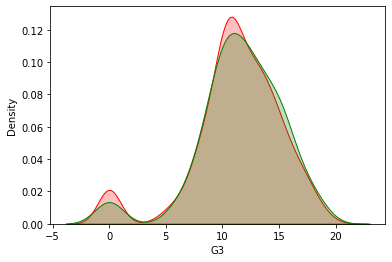

In [48]:
 
# plotting both distibutions on the same figure
fig = sns.kdeplot(trainDependentVariables, shade=True, color="r")
fig = sns.kdeplot(testDependentVariables, shade=True, color="g")
plt.show()

**Вывод**  
Примерно одинаковое распределение целевой переменной

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* Для решения задачи примените следующие методы:  
  * Линейная регрессия + регуляризации  
  * Полиномиальная регрессия  
  * KNN  
  * Деревья решений, Random Forest  
  
  Для каждого метода выполните настройку гиперпараметров на кросс-валидации.  
<br>    
* Оцените качество каждой модели на отложенной выборке, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

In [51]:
regr_data = cdata.copy()

**!** Удаляю признак "G2"

In [52]:
regr_data.drop('G2', axis=1, inplace=True) 
regr_data

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,...,is_school_MS,is_famsize_small,is_pstatus_t,Mjob__at_home,Mjob__health,Mjob__other,Mjob__services,Mjob__teacher,Fjob__at_home,Fjob__health,Fjob__other,Fjob__services,Fjob__teacher,reason__course,reason__home,reason__other,reason__reputation,guardian__father,guardian__mother,guardian__other
0,16,3,4,1,1,0,0,0,0,1,1,1,0,3,2,1,1,4,5,12,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,17,3,2,1,2,0,0,0,1,0,1,1,0,5,3,4,1,3,3,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,16,1,2,2,1,2,0,0,0,0,1,1,0,4,4,5,3,5,5,0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,17,2,3,2,2,0,0,0,1,1,1,1,0,4,4,3,1,1,3,4,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,16,1,1,2,1,0,0,0,0,1,1,0,0,4,3,2,1,4,5,2,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,15,3,3,2,3,2,0,1,1,1,1,1,1,4,2,1,2,3,3,8,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1040,15,2,1,1,2,0,0,0,1,1,1,1,1,5,4,2,1,1,5,4,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1041,16,1,1,3,2,0,0,0,0,1,1,0,0,5,3,2,1,1,1,0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1042,16,2,1,4,1,0,0,0,0,1,1,0,0,3,2,1,1,1,2,4,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
regr_data.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G3', 'is_male', 'is_address_U', 'is_subject_por',
       'is_school_MS', 'is_famsize_small', 'is_pstatus_t', 'Mjob__at_home',
       'Mjob__health', 'Mjob__other', 'Mjob__services', 'Mjob__teacher',
       'Fjob__at_home', 'Fjob__health', 'Fjob__other', 'Fjob__services',
       'Fjob__teacher', 'reason__course', 'reason__home', 'reason__other',
       'reason__reputation', 'guardian__father', 'guardian__mother',
       'guardian__other'],
      dtype='object')

## K Nearest Neighbors 

In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
import numpy as np

### Вариант 1. (с G1)

In [55]:
(trainData, 
testData, 
trainDependentVariables, 
testDependentVariables) = train_test_split(regr_data.drop('G3', axis=1),
                                            regr_data['G3'],
                                            test_size=0.2,
                                            random_state=5)   

**!** Важно привести данные к стандартному виду

In [56]:
school_scaler = MinMaxScaler()
school_scaler.fit(trainData)

MinMaxScaler()

In [57]:
trainData = school_scaler.transform(trainData) 
testData = school_scaler.transform(testData)   

***Подбор k на кросс-валидации***

In [66]:
from sklearn.model_selection import GridSearchCV

In [59]:
params = {
    'kneighborsregressor__n_neighbors': [i for i in range(1, 51)], 
    'kneighborsregressor__weights': ['uniform', 'distance']
}

In [60]:
kf = KFold(n_splits=5, shuffle=True)
knn = KNeighborsRegressor()
scaler = MinMaxScaler()

knrModel = make_pipeline(
    scaler, 
    knn
)

gd = GridSearchCV(knrModel,
                  params,
                  cv=kf, 
                  scoring='neg_mean_absolute_error', 
                  n_jobs=-1)

In [61]:
gd.fit(trainData, trainDependentVariables)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'kneighborsregressor__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                                                              20, 21, 22, 23,
                                                              24, 25, 26, 27,
                                                              28, 29, 30, ...],
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']},
             s

In [62]:
gd.best_params_

{'kneighborsregressor__n_neighbors': 15,
 'kneighborsregressor__weights': 'distance'}

Оптимальные параметры  
*  кол-во соседей - 13
* веса - distance

Теперь обучим модель на нормированных данных

In [63]:
knrModel = KNeighborsRegressor(n_neighbors=15, weights='distance')
knrModel.fit(trainData, trainDependentVariables)

KNeighborsRegressor(n_neighbors=15, weights='distance')

In [64]:
%%time
predictedDependentVariables = knrModel.predict(testData)

Wall time: 13.1 ms


In [65]:
def compute_metrics(y_pred, y_true, return_metrics=False):
    mse = metrics.mean_squared_error(y_pred=y_pred, 
                                     y_true=y_true)

    rmse = np.sqrt(mse)

    mae = metrics.mean_absolute_error(y_pred=y_pred, 
                                      y_true=y_true)

    medae = metrics.median_absolute_error(y_pred=y_pred, 
                                          y_true=y_true)

    R2 = metrics.r2_score(y_pred=y_pred, 
                          y_true=y_true)
    
    if return_metrics: 
        return mse, rmse, mae, medae, R2
    else:
        print(f"MSE:   {mse}\nRMSE:  {rmse}\nMAE:   {mae}\nMedAE: {medae}\nR2:    {R2}")

In [66]:
compute_metrics(y_pred=predictedDependentVariables, 
                y_true=testDependentVariables)

MSE:   10.632220129378515
RMSE:  3.2607085318038647
MAE:   2.367776545217268
MedAE: 1.788454109601016
R2:    0.22929381200836552


***Вывод:***

R2: 0.23 - модель очень слабо обучилась, тк если коэффициент R2 меньше 0,5 , то, с большей долей уверенности модель не отражает реальное положение вещей.

### Вариант 2. (без G1)

In [67]:
(trainData, 
testData, 
trainDependentVariables, 
testDependentVariables) = train_test_split(regr_data.drop(['G3', 'G1'], axis=1),
                                            regr_data['G3'],
                                            test_size=0.2,
                                            random_state=5)   

**!** Важно привести данные к стандартному виду

In [68]:
school_scaler = MinMaxScaler()
school_scaler.fit(trainData)

trainData = school_scaler.transform(trainData) 
testData = school_scaler.transform(testData)

***Подбор k на кросс-валидации***

In [69]:
kf = KFold(n_splits=5, shuffle=True)
knn = KNeighborsRegressor()
scaler = MinMaxScaler()

knrModel = make_pipeline(
    scaler, 
    knn
)

gd = GridSearchCV(knrModel,
                  params,
                  cv=kf, 
                  scoring='neg_mean_absolute_error', 
                  n_jobs=-1)

In [70]:
gd.fit(trainData, trainDependentVariables)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'kneighborsregressor__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                                                              20, 21, 22, 23,
                                                              24, 25, 26, 27,
                                                              28, 29, 30, ...],
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']},
             s

In [71]:
gd.best_params_

{'kneighborsregressor__n_neighbors': 17,
 'kneighborsregressor__weights': 'distance'}

In [74]:
knrModel = KNeighborsRegressor(n_neighbors=17, weights='distance')
knrModel.fit(trainData, trainDependentVariables)

KNeighborsRegressor(n_neighbors=17, weights='distance')

In [75]:
%%time
predictedDependentVariables = knrModel.predict(testData)

Wall time: 8.03 ms


In [76]:
compute_metrics(y_pred=predictedDependentVariables, 
                y_true=testDependentVariables)

MSE:   11.227137567048558
RMSE:  3.3506921026928986
MAE:   2.4332398520810674
MedAE: 1.8017461044343275
R2:    0.18616955903230992


**Выводы**  
R2:  0.19 - как и следовало ожидать, значение стало хуже, модель очень слабо обучилась, тк если коэффициент R2 меньше 0,5 , то, с большей долей уверенности модель не отражает реальное положение вещей.


### Сравнение Варианта 1 (с G1) и  Варианта 2 (без G1)

* Во втором варианте результаты обученной модели оказались хуже, чем в первом.
* В целом оба варианта показали плохие результаты.

## Линейная регрессия + регуляризации

In [77]:
from sklearn import linear_model
from sklearn import preprocessing

### Вариант 1. (с G1)

### Линейная регрессия

**Обучающая и тестовая выборки**

In [78]:
(trainData, 
testData, 
trainDependentVariables, 
testDependentVariables) = train_test_split(regr_data.drop('G3', axis=1),
                                            regr_data['G3'],
                                            test_size=0.2,
                                            random_state=5)   

**Подбор оптимальных гиперпараметров на кросс-валидации**

In [79]:
params = [
    {
        'n_jobs': [i for i in range(-1, 6)],
        'fit_intercept': [True, False]
    }
]

In [92]:
from sklearn.model_selection import StratifiedKFold

In [83]:
rf_model = linear_model.LinearRegression()


skf = StratifiedKFold(n_splits=5, shuffle=True)

clf = GridSearchCV(rf_model, params, cv=skf, scoring='neg_mean_absolute_error', n_jobs=5)

In [89]:
clf.fit(trainData,trainDependentVariables)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LinearRegression(), n_jobs=5,
             param_grid=[{'fit_intercept': [True, False],
                          'n_jobs': [-1, 0, 1, 2, 3, 4, 5]}],
             scoring='neg_mean_absolute_error')

In [90]:
clf.best_params_

{'fit_intercept': True, 'n_jobs': -1}

**Теперь обучим модель с подобранными параметрами**

**Нормализую данные**

In [94]:
regressionModel = linear_model.LinearRegression(normalize=True,
                                                fit_intercept=True, n_jobs=-1)
regressionModel.fit(trainData, trainDependentVariables)

LinearRegression(fit_intercept=False, n_jobs=-1, normalize=True)

In [95]:
predictedDependentVariables = regressionModel.predict(testData)

Оценка распределение целевой переменной на графике

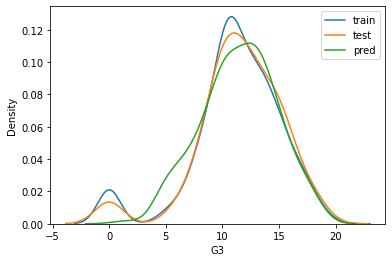

In [96]:
sns.kdeplot(trainDependentVariables, label='train')
sns.kdeplot(testDependentVariables, label='test')
sns.kdeplot(predictedDependentVariables, label='pred')
plt.legend()
plt.show()

* Важно, чтобы train и test были очень близки, потому что если окажется, что train смещенный, то  модель, которая обучается, получится несколько смещенной, что отразится на работе в худшую сторону.
* Смотря на то, что предсказала модель, можно сказать, что распределение отличается заметно, но все таки в некоторых местах предсказание удалось, дисперсия получилась близка.

In [97]:
def calc_metrics(true, pred):
    mse = metrics.mean_squared_error(true, pred)

    rmse = np.sqrt(mse)

    mae = metrics.mean_absolute_error(true, pred)

    medae = metrics.median_absolute_error(true, pred)

    R2 = metrics.r2_score(true, pred)

    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

**Ошибки на трейне**

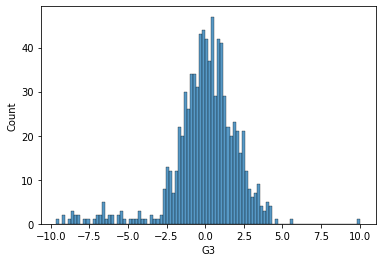

In [98]:
error = trainDependentVariables - regressionModel.predict(trainData)
sns.histplot(error, bins=100)
plt.show()

In [99]:
calc_metrics(trainDependentVariables, regressionModel.predict(trainData))

MSE:   4.718263192129275
RMSE:  2.1721563461521995
R2:    0.6893471717330811
MAE:   1.508503300188339
MedAE: 1.0697531185932965


**Ошибки на тесте**

In [100]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   4.291428073569218
RMSE:  2.0715762292441036
R2:    0.6889238436211587
MAE:   1.3729217475177493
MedAE: 0.9198860665286084


* Ошибки на тесте примерно такие же как и на трейне, на тесте они даже немного меньше.

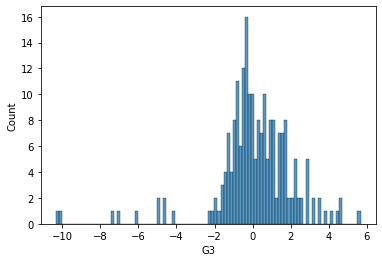

In [101]:
error = testDependentVariables - predictedDependentVariables
sns.histplot(error, bins=100)
plt.show()

Можно отдельно посмотреть на коэффиценты

In [102]:
coefs = pd.Series(regressionModel.coef_, 
                  index=trainData.columns)
x = abs(coefs).sort_values(ascending=False)
coefs[x.index]

is_subject_por        1.236044
G1                    1.011181
romantic             -0.573879
schoolsup             0.537273
guardian__father     -0.465270
reason__home         -0.464125
Mjob__teacher        -0.450873
Fjob__teacher        -0.444906
failures             -0.426910
is_address_U          0.405764
paid                  0.385481
guardian__other      -0.384650
guardian__mother     -0.333927
Fjob__services       -0.332593
reason__other        -0.327822
Mjob__at_home        -0.296055
internet              0.293319
Mjob__services       -0.282490
Mjob__other          -0.267728
is_school_MS          0.247179
is_pstatus_t         -0.240998
reason__reputation   -0.200700
reason__course       -0.191200
Fjob__at_home        -0.177908
goout                -0.135208
nursery              -0.124342
Fjob__health         -0.118806
Mjob__health          0.113299
Fjob__other          -0.109635
higher                0.105747
health               -0.103249
studytime            -0.088339
famrel  

**Вывод**
* Обучение модели прошло лучше при приминении **линейной регрессии**, чем в **KNN**.  
R2: 0.23 - knn  
R2: 0.688 -  линейная регрессия  
Улучшение очевидно.  

## Регуляризация

### Гребневая регрессия

In [103]:
(trainData, 
testData, 
trainDependentVariables, 
testDependentVariables) = train_test_split(regr_data.drop('G3', axis=1),
                                            regr_data['G3'],
                                            test_size=0.2,
                                            random_state=5)   

**Провожу стандартизацию**

In [104]:
school_scaler = MinMaxScaler()
school_scaler.fit(trainData)

MinMaxScaler()

In [105]:
trainData = school_scaler.transform(trainData)
testData = school_scaler.transform(testData) 

**Настройка значений гиперпараметра**

In [106]:
ridgeModel = linear_model.RidgeCV(alphas=np.arange(0, 30, 0.1), 
                                  cv=5, 
                                  scoring='neg_root_mean_squared_error')

In [107]:
ridgeModel.fit(trainData, trainDependentVariables)

RidgeCV(alphas=array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8...
       23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1,
       24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2,
       25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3,
       26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4,
       27.5, 27.6, 27.7, 27.8, 27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5,
       28.6, 28.7, 28.8, 28.9, 29. , 29.1, 29.2, 29.3,

In [108]:
ridgeModel.alpha_

0.4

Оптимальный параметр alpha - 0.4

In [109]:
ridgeModel = linear_model.Ridge(alpha=0.4)
ridgeModel.fit(trainData, trainDependentVariables)

Ridge(alpha=0.4)

In [110]:
predictedDependentVariables = ridgeModel.predict(testData)

In [111]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   4.255504995935274
RMSE:  2.0628875383634644
R2:    0.6915278282910851
MAE:   1.3551620466917704
MedAE: 0.8977537875554953


**Вывод**
R2: 0.6915278282910851 - модель дала неплохие результаты, тк если коэффициент близок к 1, то условная дисперсия модели достаточно мала и весьма вероятно, что модель неплохо описывает данные. 

## Лассо регрессия

In [112]:
(trainData, 
testData, 
trainDependentVariables, 
testDependentVariables) = train_test_split(regr_data.drop('G3', axis=1),
                                            regr_data['G3'],
                                            test_size=0.2,
                                            random_state=5)   

In [113]:
school_scaler = MinMaxScaler()
school_scaler.fit(trainData)

trainData = school_scaler.transform(trainData)
testData = school_scaler.transform(testData) 

**Настройка значений гиперпараметра**

In [114]:
lassoModel = linear_model.LassoCV(alphas=np.arange(0.1, 10, 0.1), 
                                  normalize=True,
                                  cv=5)

In [115]:
lassoModel.fit(trainData, trainDependentVariables)

LassoCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
        cv=5, normalize=True)

In [116]:
lassoModel.alpha_

0.1

Оптимальный параметр альфа - 0,1

In [117]:
lassoModel = linear_model.Lasso(alpha=0.1)

lassoModel.fit(trainData, trainDependentVariables)

Lasso(alpha=0.1)

In [118]:
predictedDependentVariables = lassoModel.predict(testData)

In [119]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   4.5699881216260545
RMSE:  2.1377530544069057
R2:    0.6687316400971333
MAE:   1.3423624126205609
MedAE: 0.9112375960958623


**Выводы**  
R2:  0.6687316400971333 - значение метрики стало немного хуже при применении Лассо регрессии, чем при гребневой регрессии (0,69).

### Вариант 2. (без G1)

## Линейная регрессия

**Обучающая и тестовая выборки**

In [120]:
(trainData, 
testData, 
trainDependentVariables, 
testDependentVariables) = train_test_split(regr_data.drop(['G3', 'G1'], axis=1),
                                            regr_data['G3'],
                                            test_size=0.2,
                                            random_state=5)

**Подбор оптимальных гиперпараметров на кросс-валидации**

In [121]:
params = [
    {
        'n_jobs': [i for i in range(-1, 6)],
        'fit_intercept': [True, False]
    }
]

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
rf_model = linear_model.LinearRegression()

skf = StratifiedKFold(n_splits=5, shuffle=True)

clf = GridSearchCV(rf_model, params, cv=skf, scoring='neg_mean_absolute_error', n_jobs=5)

In [129]:
clf.fit(trainData,trainDependentVariables)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LinearRegression(), n_jobs=5,
             param_grid=[{'fit_intercept': [True, False],
                          'n_jobs': [-1, 0, 1, 2, 3, 4, 5]}],
             scoring='neg_mean_absolute_error')

In [130]:
clf.best_params_

{'fit_intercept': True, 'n_jobs': -1}

**Теперь обучим модель с подобранными параметрами**

**Стандартизирую данные**

In [131]:
regressionModel = linear_model.LinearRegression(normalize=True,
                                                fit_intercept=True,
                                               n_jobs=-1)
regressionModel.fit(trainData, trainDependentVariables)

LinearRegression(n_jobs=-1, normalize=True)

In [132]:
predictedDependentVariables = regressionModel.predict(testData)

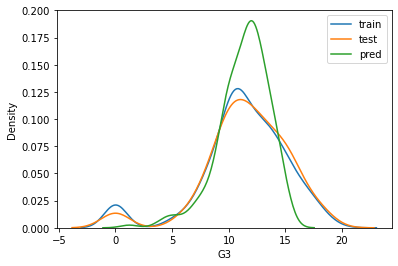

In [133]:
sns.kdeplot(trainDependentVariables, label='train')
sns.kdeplot(testDependentVariables, label='test')
sns.kdeplot(predictedDependentVariables, label='pred')
plt.legend()
plt.show()


* Важно, чтобы train и test были очень близки, потому что если окажется, что train смещенный, то модель, которая обучается, получится несколько смещенной, что отразится на работе в худшую сторону.
* Здест train и test достаточно близки друг к другу.
* Смотря на то, что предсказала модель, можно сказать, что распределение отличается заметно, предсказание не удалось.

**Ошибки на трейне**

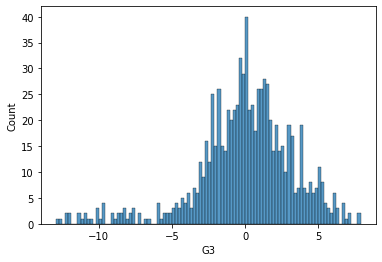

In [134]:
error = trainDependentVariables - regressionModel.predict(trainData)
sns.histplot(error, bins=100)
plt.show()

In [135]:
calc_metrics(trainDependentVariables, regressionModel.predict(trainData))

MSE:   11.099933336452096
RMSE:  3.3316562452408105
R2:    0.269174790779958
MAE:   2.425486526946108
MedAE: 1.8125


**Ошибки на тесте**

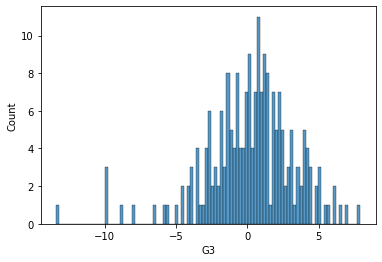

In [136]:
error = testDependentVariables - predictedDependentVariables
sns.histplot(error, bins=100)
plt.show()

In [137]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   9.820812462619617
RMSE:  3.133817554137384
R2:    0.2881109642254247
MAE:   2.3341806220095696
MedAE: 1.78125


* Ошибки на тесте примерно такие же как и на трейне, это означет что модель практически не переобучилась. 
* Однако в целом модель обучилась очень плохо. 

Можно отдельно посмотреть на коэффиценты

In [138]:
coefs = pd.Series(regressionModel.coef_, 
                  index=trainData.columns)
x = abs(coefs).sort_values(ascending=False)
coefs[x.index]


guardian__other       2.504812e+14
guardian__father      2.504812e+14
guardian__mother      2.504812e+14
reason__course       -1.474273e+14
reason__home         -1.474273e+14
reason__other        -1.474273e+14
reason__reputation   -1.474273e+14
Fjob__teacher         4.546254e+13
Fjob__at_home         4.546254e+13
Fjob__other           4.546254e+13
Fjob__health          4.546254e+13
Fjob__services        4.546254e+13
Mjob__health          4.192783e+13
Mjob__services        4.192783e+13
Mjob__teacher         4.192783e+13
Mjob__at_home         4.192783e+13
Mjob__other           4.192783e+13
higher                1.983618e+00
is_subject_por        1.950964e+00
failures             -1.584239e+00
schoolsup            -1.450121e+00
romantic             -8.052622e-01
is_school_MS         -6.627910e-01
is_address_U          6.289010e-01
is_famsize_small      4.826223e-01
nursery              -4.734675e-01
goout                -3.347918e-01
is_pstatus_t          3.260318e-01
studytime           

**Вывод**  
* В целом модель обучилась очень плохо
* R2: 0.288 - как и следовало ожидать, значение стало хуже при исключении G1, модель очень слабо обучилась.
* Если коэффициент R2 меньше 0,5 , то, с большей долей уверенности модель не отражает реальное положение вещей.

## Регуляризация

### Гребневая регрессия

In [139]:
(trainData, 
testData, 
trainDependentVariables, 
testDependentVariables) = train_test_split(regr_data.drop(['G3', 'G1'], axis=1),
                                            regr_data['G3'],
                                            test_size=0.2,
                                            random_state=5)

**Провожу стандартизацию**

In [140]:
school_scaler = MinMaxScaler()
school_scaler.fit(trainData)

MinMaxScaler()

In [141]:
trainData = school_scaler.transform(trainData)
testData = school_scaler.transform(testData) 

**Настройка значений гиперпараметра**

In [142]:
ridgeModel = linear_model.RidgeCV(alphas=np.arange(0, 30, 0.1), 
                                  cv=5, 
                                  scoring='neg_root_mean_squared_error')

In [143]:
ridgeModel.fit(trainData, trainDependentVariables)

RidgeCV(alphas=array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8...
       23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1,
       24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2,
       25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3,
       26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4,
       27.5, 27.6, 27.7, 27.8, 27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5,
       28.6, 28.7, 28.8, 28.9, 29. , 29.1, 29.2, 29.3,

In [144]:
ridgeModel.alpha_

9.3

Оптимальный параметр альфа - 9,3

In [145]:
ridgeModel = linear_model.Ridge(alpha=9.3)
ridgeModel.fit(trainData, trainDependentVariables)

Ridge(alpha=9.3)

In [146]:
predictedDependentVariables = ridgeModel.predict(testData)

In [147]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   9.699966567826467
RMSE:  3.114476933262866
R2:    0.2968708166153423
MAE:   2.3053249541180385
MedAE: 1.8112138568504932


**Выводы**  
R2:  0.2968708166153423 - как и следовало ожидать, значение стало хуже, модель очень слабо обучилась, тк если коэффициент R2 меньше 0,5 , то, с большей долей уверенности модель не отражает реальное положение вещей.

## Лассо регрессия

In [148]:
(trainData, 
testData, 
trainDependentVariables, 
testDependentVariables) = train_test_split(regr_data.drop(['G3', 'G1'], axis=1),
                                            regr_data['G3'],
                                            test_size=0.2,
                                            random_state=5)

**Провожу стандартизацию**

In [149]:
school_scaler = MinMaxScaler()
school_scaler.fit(trainData)

trainData = school_scaler.transform(trainData)
testData = school_scaler.transform(testData) 

**Настройка значений гиперпараметра**

In [150]:
lassoModel = linear_model.LassoCV(alphas=np.arange(0.1, 10, 0.1), 
                                  normalize=True,
                                  cv=5)

In [151]:
lassoModel.fit(trainData, trainDependentVariables)

LassoCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
        cv=5, normalize=True)

In [152]:
lassoModel.alpha_

9.9

Оптимальное значение альфа - 9,9

In [153]:
lassoModel = linear_model.Lasso(alpha=9.9)
lassoModel.fit(trainData, trainDependentVariables)

Lasso(alpha=9.9)

In [154]:
predictedDependentVariables = lassoModel.predict(testData)

In [155]:
calc_metrics(testDependentVariables, predictedDependentVariables)

MSE:   13.876279742609157
RMSE:  3.725087883877259
R2:    -0.005860914634483683
MAE:   2.7744721084147494
MedAE: 2.2850299401197613


**Выводы**  
R2:  -0.005860914634483683 - при удалении признака G1, Лассо регрессия совершенно перестала предсказывать, что означает - модель не отражает реальное положение вещей.

### Сравнение Варианта 1 (с G1) и  Варианта 2 (без G1)

* Сравнивая вариант 1 и 2, очевижно, что с признаком G1, модель будет точнее.
* Сравнивая значения *линейной регрессии(0,688), гребневой регрессии(0,69) и дассо регрессии(0,66)*, видим, что *гребневая регрессия* дала более высокий результат при признаке G1.

## Полиномиальная регрессия

In [156]:
from sklearn.preprocessing import PolynomialFeatures

### Вариант 1. (с G1)

In [157]:
(trainData, 
testData, 
trainDependentVariables, 
testDependentVariables) = train_test_split(regr_data.drop('G3', axis=1),
                                            regr_data['G3'],
                                            test_size=0.2,
                                            random_state=5)

**Провожу стандартизацию**

In [158]:
school_scaler = MinMaxScaler()
school_scaler.fit(trainData)

trainData = school_scaler.transform(trainData)
testData = school_scaler.transform(testData) 

### Линейная регрессия

In [159]:
poly = PolynomialFeatures(degree=1, include_bias=False)
poly.fit(trainData)

PolynomialFeatures(degree=1, include_bias=False)

In [160]:
poly_train = poly.transform(trainData)
poly_test = poly.transform(testData)

In [161]:
print('Original number of features:', trainData.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 44
Number of features after polynomial transformation: 44


In [162]:
regressionModel = linear_model.LinearRegression(normalize=True)
regressionModel.fit(poly_train, trainDependentVariables)

LinearRegression(normalize=True)

Значения совпадают с результатами для линейной модели.

In [163]:
# Train
calc_metrics(trainDependentVariables, regressionModel.predict(poly_train))

MSE:   4.720846100767216
RMSE:  2.172750814236924
R2:    0.6891771117256467
MAE:   1.5113398203592814
MedAE: 1.078125


In [164]:
# Test
calc_metrics(testDependentVariables, regressionModel.predict(poly_test))

MSE:   4.2867122084330145
RMSE:  2.0704376852330078
R2:    0.6892656862841189
MAE:   1.3717105263157894
MedAE: 0.9453125


**Выводы**  
R2: 0.6892656862841189 - модель неплохо обучилась, хотя результаты далеки от идеала, коэффициент R2 больше 0,5 - значит с большей долей уверенности модель отражает реальное положение вещей.

### Квадратичная регрессия

In [165]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(trainData)

poly_train = poly.transform(trainData)
poly_test = poly.transform(testData)

print('Original number of features:', trainData.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 44
Number of features after polynomial transformation: 1034


In [166]:
regressionModel = linear_model.LinearRegression(normalize=True)
regressionModel.fit(poly_train, trainDependentVariables)

LinearRegression(normalize=True)

Качество стало заметно хуже по сравнению с линейной моделью

In [167]:
print('Train:')
calc_metrics(trainDependentVariables, regressionModel.predict(poly_train))

print('\nTest:')
calc_metrics(testDependentVariables, regressionModel.predict(poly_test))

Train:
MSE:   8.6453955142084
RMSE:  2.940305343702997
R2:    0.4307827989640076
MAE:   2.360139876497006
MedAE: 2.044921875

Test:
MSE:   1.0109614830856462e+25
RMSE:  3179562050166.1016
R2:    -7.328236824991805e+23
MAE:   1632631790451.8887
MedAE: 244692294577.14844


In [168]:
error = abs(testDependentVariables - regressionModel.predict(poly_test))
np.quantile(error, np.arange(0, 1.01, 0.1))

array([3.90625000e-01, 2.74453125e+00, 5.14531250e+00, 8.58828125e+00,
       1.33734375e+01, 2.44692295e+11, 8.50285800e+11, 1.79459004e+12,
       3.01106191e+12, 5.11388201e+12, 1.99436145e+13])

**Вывод:**  
Все очень плохо - модель переобучилась

**!** Это можно поправить регуляризацией

In [169]:
regressionModel = linear_model.Ridge(alpha=0.01, normalize=True)
regressionModel.fit(poly_train, trainDependentVariables)

Ridge(alpha=0.01, normalize=True)

In [170]:
print('Train:')
calc_metrics(trainDependentVariables, regressionModel.predict(poly_train))

print('\nTest:')
calc_metrics(testDependentVariables, regressionModel.predict(poly_test))

Train:
MSE:   0.9171669728231925
RMSE:  0.9576883484846166
R2:    0.9396132639281716
MAE:   0.6974373934511287
MedAE: 0.5072299101785767

Test:
MSE:   9.546895143375385
RMSE:  3.0898050332303146
R2:    0.3079666265772866
MAE:   2.339486137599501
MedAE: 1.7846357799368189


**Вывод**  
* Видно, что после регуляризация ситуация на train сильно улучшилась, однако на тесте все достаточно плохо, значит модель обучилась только под конкретные параметры.

### Регрессия полиномом 3-й степени

In [171]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(trainData)

poly_train = poly.transform(trainData)
poly_test = poly.transform(testData)

print('Original number of features:', trainData.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 44
Number of features after polynomial transformation: 16214


In [172]:
regressionModel = linear_model.LinearRegression(normalize=True)
regressionModel.fit(poly_train, trainDependentVariables)

LinearRegression(normalize=True)

In [173]:
print('Train:')
calc_metrics(trainDependentVariables, regressionModel.predict(poly_train))

print('\nTest:')
calc_metrics(testDependentVariables, regressionModel.predict(poly_test))

Train:
MSE:   2.7182446255437745e-28
RMSE:  1.6487099883071536e-14
R2:    1.0
MAE:   1.2829125652698455e-14
MedAE: 1.0658141036401503e-14

Test:
MSE:   10.491312288900629
RMSE:  3.239029528871361
R2:    0.2395079105946777
MAE:   2.3914516110193027
MedAE: 1.7500456364613193


**Вывод**  
* Видно, что train  при R2 выдает идеальное значение (1,0), однако на тесте все достаточно плохо(0,39), значит модель обучилась только под конкретные параметры.

### Вариант 2. (без G1) - Полиномиальная регрессия

In [174]:
(trainData, 
testData, 
trainDependentVariables, 
testDependentVariables) = train_test_split(regr_data.drop(['G3', 'G1'], axis=1),
                                            regr_data['G3'],
                                            test_size=0.2,
                                            random_state=5)

**Провожу стандартизацию**

In [175]:
school_scaler = MinMaxScaler()
school_scaler.fit(trainData)

trainData = school_scaler.transform(trainData)
testData = school_scaler.transform(testData) 

### Линейная регрессия

In [176]:
poly = PolynomialFeatures(degree=1, include_bias=False)
poly.fit(trainData)

PolynomialFeatures(degree=1, include_bias=False)

In [177]:
poly_train = poly.transform(trainData)
poly_test = poly.transform(testData)

In [178]:
print('Original number of features:', trainData.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 43
Number of features after polynomial transformation: 43


In [179]:
regressionModel = linear_model.LinearRegression(normalize=True)
regressionModel.fit(poly_train, trainDependentVariables)

LinearRegression(normalize=True)

In [180]:
# Train
calc_metrics(trainDependentVariables, regressionModel.predict(poly_train))

MSE:   11.08320198059082
RMSE:  3.329144331594955
R2:    0.2702763916884694
MAE:   2.4150916916167664
MedAE: 1.7861328125


In [181]:
# Test
calc_metrics(testDependentVariables, regressionModel.predict(poly_test))

MSE:   9.674333554135556
RMSE:  3.1103590715760707
R2:    0.2987288972446055
MAE:   2.3095095693779903
MedAE: 1.7216796875


Значения совпадают с результатами для линейной модели

### Квадратичная регрессия

In [182]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(trainData)

poly_train = poly.transform(trainData)
poly_test = poly.transform(testData)

print('Original number of features:', trainData.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 43
Number of features after polynomial transformation: 989


In [183]:
regressionModel = linear_model.LinearRegression(normalize=True)
regressionModel.fit(poly_train, trainDependentVariables)

LinearRegression(normalize=True)

Качество стало заметно хуже по сравнению с линейной моделью.

In [184]:
print('Train:')
calc_metrics(trainDependentVariables, regressionModel.predict(poly_train))

print('\nTest:')
calc_metrics(testDependentVariables, regressionModel.predict(poly_test))

Train:
MSE:   0.5746311861597849
RMSE:  0.7580443167518538
R2:    0.9621659928829972
MAE:   0.5374403536676646
MedAE: 0.328125

Test:
MSE:   4.893817872759307e+24
RMSE:  2212197521190.029
R2:    -3.5474206436131435e+23
MAE:   1044553065431.8744
MedAE: 34395152706.73535


In [185]:
error = abs(testDependentVariables - regressionModel.predict(poly_test))
np.quantile(error, np.arange(0, 1.01, 0.1))

array([1.46484375e-02, 1.82871094e+00, 2.63457031e+00, 4.93574219e+00,
       7.50722656e+00, 3.43951527e+10, 4.74012523e+11, 9.51527408e+11,
       1.74710775e+12, 2.88662554e+12, 1.32249478e+13])

Все очень плохо - модель переобучилась

Это можно поправить регуляризацией

In [186]:
regressionModel = linear_model.Ridge(alpha=0.01, normalize=True)
regressionModel.fit(poly_train, trainDependentVariables)

Ridge(alpha=0.01, normalize=True)

In [187]:
print('Train:')
calc_metrics(trainDependentVariables, regressionModel.predict(poly_train))

print('\nTest:')
calc_metrics(testDependentVariables, regressionModel.predict(poly_test))

Train:
MSE:   1.9267445409954913
RMSE:  1.388072239112753
R2:    0.8731421676504696
MAE:   1.0265978078102562
MedAE: 0.7993631906592977

Test:
MSE:   22.908811817704755
RMSE:  4.786315056252017
R2:    -0.6606092436569013
MAE:   3.375631963417443
MedAE: 2.350664058768504


**Вывод**
* результаты на train и test сильно отличаются, на  train они заметно лучше, чем на тесте, что означает, что модель обучилась под конкретный набор данных, что плохо.

### Регрессия полиномом 3-й степени

In [188]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(trainData)

poly_train = poly.transform(trainData)
poly_test = poly.transform(testData)

print('Original number of features:', trainData.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 43
Number of features after polynomial transformation: 15179


In [189]:
regressionModel = linear_model.LinearRegression(normalize=True)
regressionModel.fit(poly_train, trainDependentVariables)

LinearRegression(normalize=True)

In [190]:
print('Train:')
calc_metrics(trainDependentVariables, regressionModel.predict(poly_train))

print('\nTest:')
calc_metrics(testDependentVariables, regressionModel.predict(poly_test))

Train:
MSE:   2.915450404413037e-28
RMSE:  1.70746900540333e-14
R2:    1.0
MAE:   1.3205670755182101e-14
MedAE: 1.0658141036401503e-14

Test:
MSE:   24.143633398451897
RMSE:  4.913617139994924
R2:    -0.7501187366665294
MAE:   3.490877878077227
MedAE: 2.6094127629540633


**Вывод**  
* Видно, что train  при R2 выдает идеальное значение (1,0), однако на тесте все достаточно плохо(-0,75), значит модель обучилась только под конкретные параметры.

**Сравнение Варианта 1 (с G1) и  Варианта 2 (без G1)**

Используя различные методы *полиномиальной регрессии*, можно сказать, что для данного набора данных эа модель обучения не подходит. Модели оказывались переобученными и на тесте выдавали очень плохие результаты, даже с признаком G1.

## Деревья решений, Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [83]:
import warnings
warnings.simplefilter('ignore')

### Вариант 1. (с G1)

### Деревья решений 

In [193]:
from sklearn.tree import DecisionTreeRegressor

In [194]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(regr_data.drop('G3',
                                            axis=1),
                                            regr_data['G3'],
                                            test_size=0.2,
                                            random_state=5)

In [59]:
from sklearn.preprocessing import StandardScaler

In [197]:
school_scaler = StandardScaler()
trainData = pd.DataFrame(school_scaler.fit_transform(trainData), columns=trainData.columns)
testData = pd.DataFrame(school_scaler.transform(testData), columns=testData.columns)

**Подбор оптимальных гиперпараметров на кросс-валидации**

In [198]:
params = {
    'decisiontreeregressor__max_depth': [i for i in range(2, 50,10)],
    'decisiontreeregressor__splitter': ['best', 'random'],
    'decisiontreeregressor__criterion': ['mse', 'friedman_mse','mae', 'poisson']
}

In [199]:
kf = KFold(n_splits=5, shuffle=True)
dt = DecisionTreeRegressor()
scaler = StandardScaler()

dtModel = make_pipeline(
    scaler, 
    dt
)

gd = GridSearchCV(dtModel,
                  params,
                  cv=kf, 
                  scoring='neg_mean_absolute_error', 
                  n_jobs=-1)

In [200]:
gd.fit(trainData, train_label)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'decisiontreeregressor__criterion': ['mse',
                                                              'friedman_mse',
                                                              'mae',
                                                              'poisson'],
                         'decisiontreeregressor__max_depth': [2, 12, 22, 32,
                                                              42],
                         'decisiontreeregressor__splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

In [201]:
gd.best_params_

{'decisiontreeregressor__criterion': 'mae',
 'decisiontreeregressor__max_depth': 2,
 'decisiontreeregressor__splitter': 'best'}

**Теперь обучим модель с подобранными параметрами**

In [202]:
dt_model = DecisionTreeRegressor(criterion='mae',
                                 max_depth=2,
                                 splitter='best')
dt_model.fit(trainData, train_label)

DecisionTreeRegressor(criterion='mae', max_depth=2)

In [203]:
preds = dt_model.predict(testData)

In [204]:
compute_metrics(y_pred=preds, 
                y_true=test_label)


MSE:   5.205741626794258
RMSE:  2.281609437829853
MAE:   1.4162679425837321
MedAE: 1.0
R2:    0.6226472706514128


**Выводы**  
R2: 0.62 - модель смогла обучиться, но не очень хорошо, однако коэффициент R2 больше 0,5 , что уже хорошо, возможно стоит перебрать и подобрать больше параметров и провести более тонкую настройку дерева, чтобы прибавить учтойчивости модели.

### Random Forest

In [206]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(regr_data.drop('G3',
                                            axis=1),
                                            regr_data['G3'],
                                            test_size=0.2,
                                            random_state=5)

In [207]:
school_scaler = StandardScaler()
trainData = pd.DataFrame(school_scaler.fit_transform(trainData), columns=trainData.columns)
testData = pd.DataFrame(school_scaler.transform(testData), columns=testData.columns)


**Настройка гиперпараметров модели**

In [208]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [209]:
params = [
    # это параметры леса
    {
        'n_estimators': [2, 5, 10, 20, 50, 100],
        'max_depth': range(5,11,2),
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [2, 5, 10],
    },
    # это параметры дерева
    {
        'n_estimators': [1],
        'bootstrap': [False], 
        'max_depth': range(5,11, 2),
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf':[2, 5, 10],
    }
]

In [210]:
rf_model = RandomForestRegressor()

skf = StratifiedKFold(n_splits=5, shuffle=True)

clf = GridSearchCV(rf_model, params, cv=skf, scoring='neg_mean_absolute_error', n_jobs=5)

In [472]:
clf.fit(trainData, train_label)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=5,
             param_grid=[{'max_depth': range(5, 11, 2),
                          'min_samples_leaf': [2, 5, 10],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [2, 5, 10, 20, 50, 100]},
                         {'bootstrap': [False], 'max_depth': range(5, 11, 2),
                          'min_samples_leaf': [2, 5, 10],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [1]}],
             scoring='neg_mean_absolute_error')

In [473]:
clf.best_params_

{'bootstrap': False,
 'max_depth': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 1}

In [211]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
rf_model = RandomForestRegressor(n_estimators=1, 
                                  max_depth=7, 
                                  min_samples_leaf=10, 
                                  min_samples_split=10,
                                bootstrap=False)

scores = pd.Series(cross_val_score(rf_model,trainData, train_label, cv=rskf, n_jobs=5))

In [212]:
rf_model.fit(trainData, train_label)

RandomForestRegressor(bootstrap=False, max_depth=7, min_samples_leaf=10,
                      min_samples_split=10, n_estimators=1)

In [213]:
preds = rf_model.predict(testData)

In [214]:
calc_metrics(test_label, preds)


MSE:   4.444243246208081
RMSE:  2.108137387887251
R2:    0.6778466087879229
MAE:   1.3707640593829737
MedAE: 0.8399999999999999


**Вывод**
* Обучение модели прошло лучше при приминении модели **RandomForest**, чем в **деревьях решений**.
R2: 0.62 - деревьях решений
R2: 0.67 - RandomForest
Улучшение очевидно. Однако стоит понимать, что качество модели далеко ее от 1,0 на метрике R2.

### Вариант 2. (без G1)

### Деревья решений

In [216]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(regr_data.drop(['G3','G1'],
                                            axis=1),
                                            regr_data['G3'],
                                            test_size=0.2,
                                            random_state=5)

In [217]:
school_scaler = StandardScaler()
trainData = pd.DataFrame(school_scaler.fit_transform(trainData), columns=trainData.columns)
testData = pd.DataFrame(school_scaler.transform(testData), columns=testData.columns)


**Подбор оптимальных гиперпараметров на кросс-валидации**

In [218]:
params = {
    'decisiontreeregressor__max_depth': [i for i in range(2, 50,10)],
    'decisiontreeregressor__splitter': ['best', 'random'],
    'decisiontreeregressor__criterion': ['mse', 'friedman_mse','mae', 'poisson']
}

In [219]:
kf = KFold(n_splits=5, shuffle=True)
dt = DecisionTreeRegressor()
scaler = StandardScaler()

dtModel = make_pipeline(
    scaler, 
    dt
)

gd = GridSearchCV(dtModel,
                  params,
                  cv=kf, 
                  scoring='neg_mean_absolute_error',
                  n_jobs=-1)

In [220]:
gd.fit(trainData, train_label)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'decisiontreeregressor__criterion': ['mse',
                                                              'friedman_mse',
                                                              'mae',
                                                              'poisson'],
                         'decisiontreeregressor__max_depth': [2, 12, 22, 32,
                                                              42],
                         'decisiontreeregressor__splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

In [221]:
gd.best_params_

{'decisiontreeregressor__criterion': 'mse',
 'decisiontreeregressor__max_depth': 2,
 'decisiontreeregressor__splitter': 'best'}

**Теперь обучим модель с подобранными параметрами**

In [222]:
dt_model = DecisionTreeRegressor(criterion='mae',
                                 max_depth=2,
                                 splitter='best')
dt_model.fit(trainData, train_label)

DecisionTreeRegressor(criterion='mae', max_depth=2)

In [223]:
preds = dt_model.predict(testData)

In [224]:
compute_metrics(y_pred=preds, 
                y_true=test_label)

MSE:   10.880382775119617
RMSE:  3.298542522860607
MAE:   2.3444976076555024
MedAE: 2.0
R2:    0.2113050491372358


**Выводы**  
R2: 0.2 - Как и следовало ожидать, значения стали хуже, модель очень плохо обучилась, когда убрали из датасета G1, возможно стиоит подобрать больше  парамтеров, что прибавит устойчивости дереву, тк если коэффициент R2 меньше 0,5 , то, с большей долей уверенности модель не отражает реальное положение вещей.

### Random Forest

In [225]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(regr_data.drop(['G3','G1'],
                                            axis=1),
                                            regr_data['G3'],
                                            test_size=0.2,
                                            random_state=5)

In [226]:
school_scaler = StandardScaler()
trainData = pd.DataFrame(school_scaler.fit_transform(trainData), columns=trainData.columns)
testData = pd.DataFrame(school_scaler.transform(testData), columns=testData.columns)


**Настройка гиперпараметров модели**

In [227]:
params = [
    # это параметры леса
    {
        'n_estimators': [2, 5, 10, 20, 50, 100],
        'max_depth': range(5,11,2),
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [2, 5, 10]
    },
    # это параметры дерева
    {
        'n_estimators': [1],
        'bootstrap': [False], 
        'max_depth': range(5,11, 2),
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf':[2, 5, 10]
    }
]

In [228]:
rf_model = RandomForestRegressor()

skf = StratifiedKFold(n_splits=5, shuffle=True)

clf = GridSearchCV(rf_model, params, cv=skf, scoring='neg_mean_absolute_error', n_jobs=5)

In [495]:
clf.fit(trainData, train_label)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=5,
             param_grid=[{'max_depth': range(5, 11, 2),
                          'min_samples_leaf': [2, 5, 10],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [2, 5, 10, 20, 50, 100]},
                         {'bootstrap': [False], 'max_depth': range(5, 11, 2),
                          'min_samples_leaf': [2, 5, 10],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [1]}],
             scoring='neg_mean_absolute_error')

In [496]:
clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

**Теперь обучим модель с подобранными параметрами**

In [229]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
rf_model = RandomForestRegressor(n_estimators=100, 
                                  max_depth=9, 
                                  min_samples_leaf=2, 
                                  min_samples_split=5)

scores = pd.Series(cross_val_score(rf_model,trainData, train_label, cv=rskf, n_jobs=5))

In [230]:
rf_model.fit(trainData, train_label)

RandomForestRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=5)

In [231]:
preds = rf_model.predict(testData)

In [232]:
calc_metrics(test_label, preds)

MSE:   7.87235354041264
RMSE:  2.8057714697410123
R2:    0.429350454202031
MAE:   2.1167134397482306
MedAE: 1.5973418598739713


**Вывод**
* Обучение модели прошло лучше при приминении **random forest**, чем в **деревьях решений**.
* Однако метрики показывают, что без признака G1 модель крайне плохо обучается.  
R2:  0.42 - random forest  
R2: 0,2 - деревьях решений

### Сравнение Варианта 1 (с G1) и  Варианта 2 (без G1)

**Вывод**  
В целом видно, что признак G1 играет большую роль в обучении моделей, на данных по ученикам стоит сказать , что алгоритм Random Forest  справился лучше, чем деревья решений в обоих вариантах.


### **Общий вывод**
* Как уже было отмечено, признак G1 важен для хорошего обучения модели при применении любых функций.
* Лучше всего на данном датасете в **1 варианте** показала себя **гребневая регрессия (R2-0,69)**.
* Лучше всего на данном датасете в **2 варианте** показала себя также **Random Forest (R2-0,42)**. Однако, здесь ясно, что данным нельзя доверять.
* при использовании **полиномиальной регрессии** модель крайне склонна к переобучениям.

## Часть 3. Бинарная классификация

Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  


In [233]:
bc_data = cdata.copy()

* Создаю отдельную колонку, которая бдет содержать информацию, сдал человек или нет.

In [234]:
bc_data['is_pass'] = bc_data['G3'].apply(lambda x: 0 if x < 8 else 1)
bc_data['is_pass'].value_counts()

1    944
0    100
Name: is_pass, dtype: int64

In [235]:
bc_data.drop(columns=['G1', 'G2', 'G3'], axis=1, inplace=True)

In [236]:
bc_data.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'is_male', 'is_address_U', 'is_subject_por', 'is_school_MS',
       'is_famsize_small', 'is_pstatus_t', 'Mjob__at_home', 'Mjob__health',
       'Mjob__other', 'Mjob__services', 'Mjob__teacher', 'Fjob__at_home',
       'Fjob__health', 'Fjob__other', 'Fjob__services', 'Fjob__teacher',
       'reason__course', 'reason__home', 'reason__other', 'reason__reputation',
       'guardian__father', 'guardian__mother', 'guardian__other', 'is_pass'],
      dtype='object')

### Задание 1  
  
* **Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.**


In [249]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('seaborn')

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

In [250]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(bc_data.drop(['is_pass'],
                                axis=1),
                                bc_data['is_pass'],
                                test_size=0.2, 
                                random_state=56428234)

**Стандартизирую данные**

In [251]:
from sklearn.preprocessing import StandardScaler

In [252]:
school_scaler = StandardScaler()
trainData = pd.DataFrame(school_scaler.fit_transform(trainData), columns=trainData.columns)
testData = pd.DataFrame(school_scaler.transform(testData), columns=testData.columns)

In [253]:
print('Size of train set:', trainData.shape)
print('Size of test set:', testData.shape)

Size of train set: (835, 43)
Size of test set: (209, 43)


In [254]:
print('Class distribution on train:',
      train_label.value_counts(normalize=True),
      '\nClass distribution on test:', 
      test_label.value_counts(normalize=True),
      sep='\n')

Class distribution on train:
1    0.891018
0    0.108982
Name: is_pass, dtype: float64

Class distribution on test:
1    0.956938
0    0.043062
Name: is_pass, dtype: float64


Обучаю *Дерево решений* глубиной 5

In [255]:
from sklearn.tree import DecisionTreeClassifier

In [256]:
dtree_model = DecisionTreeClassifier(max_depth=5)
dtree_model.fit(trainData, train_label)

DecisionTreeClassifier(max_depth=5)

In [257]:
preds = dtree_model.predict(testData)

**Оценка качества**

In [75]:
from sklearn import metrics
from plot_cm import plot_confusion_matrix

In [259]:
def get_model_quality(test_label, preds):
    print("Accuracy:",
      round(metrics.accuracy_score(test_label, preds), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(test_label, preds), 5))

    print()
    print(metrics.classification_report(test_label, preds))

    plot_confusion_matrix(cm=metrics.confusion_matrix(test_label, preds),
                          target_names=['fail', 'pass'],
                          normalize=True)

Accuracy: 0.92344 
Balanced accuracy: 0.64167

              precision    recall  f1-score   support

           0       0.23      0.33      0.27         9
           1       0.97      0.95      0.96       200

    accuracy                           0.92       209
   macro avg       0.60      0.64      0.62       209
weighted avg       0.94      0.92      0.93       209



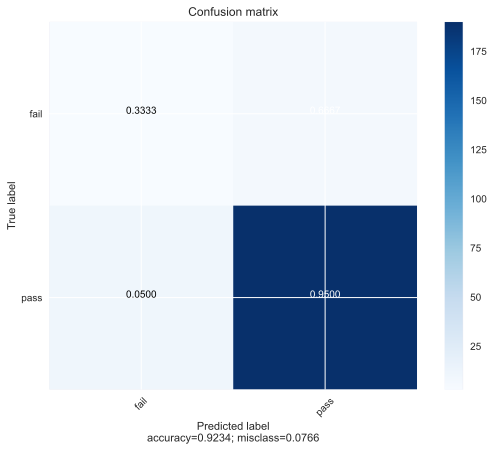

In [260]:
get_model_quality(test_label, preds)

**Вывод**
* Простая точность выдает прекрасный результат - 0,923, однако не стоит верить данной оценке на все 100 процентов, поэтому стоит посмотреть на сбалансированную точность.
* Сбалансированная точность пытается учесть дисбаланс в классах и выдает значение - 0,64.
* Мой классификатор отлично выделяет 'pass', но не 'fail'. Этот факт также подтверждают метрики, f1-score например выдает fail - 0.27, pass - 0.96.


**Оценка качества на 5-fold валидации**

In [261]:

kf = KFold(n_splits = 5, shuffle = True)


In [262]:
trees = []

In [263]:
scores = []
for i in range(5):
    dtree_model = DecisionTreeClassifier(max_depth=5)
    result = next(kf.split(trainData), None)
    x_train = trainData.iloc[result[0]]
    x_test = trainData.iloc[result[1]]
    y_train = train_label.iloc[result[0]]
    y_test = train_label.iloc[result[1]]
    model = dtree_model.fit(x_train,y_train)
    predictions = dtree_model.predict(x_test)
    scores.append(model.score(x_test,y_test))
    trees.append(dtree_model)
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

Scores from each Iteration:  [0.874251497005988, 0.8203592814371258, 0.8622754491017964, 0.8383233532934131, 0.874251497005988]
Average K-Fold Score : 0.8538922155688624


* Самое первое дерево показало лучшее качество

In [264]:
import warnings
warnings.simplefilter('ignore')

In [265]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


In [266]:
from sklearn.dummy import DummyClassifier

* Далее, чтобы понять, как обучилась модель без особой настройки параметов, можно сравнить ее с **фиктивным классификатором** (это тип классификатора, который не генерирует никакой информации о данных и классифицирует данные, используя только простые правила. Поведение классификатора полностью не зависит от обучающих данных, поскольку тенденции в обучающих данных полностью игнорируются и вместо этого использует одну из стратегий для прогнозирования метки класса.)
* Сравниваю его с DecisionTreeClassifier(max_depth=5)


In [267]:
dt = DecisionTreeClassifier(max_depth=5)
dm = DummyClassifier(strategy='most_frequent')

skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)


scores_dtree = cross_val_score(dt, trainData, train_label, cv=skf, scoring='f1_micro')
scores_dummy = cross_val_score(dm, trainData, train_label, cv=skf, scoring='f1_micro')

scores_dtree = np.array(scores_dtree)
scores_dummy = np.array(scores_dummy)

In [268]:
print('Mean score for DTree:', round(np.mean(scores_dtree), 5),
      '\nMean score for Dummy:', round(np.mean(scores_dummy), 5))

Mean score for DTree: 0.86874 
Mean score for Dummy: 0.89102


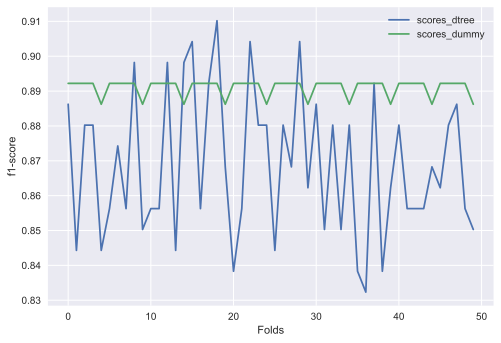

In [269]:
g_data = pd.DataFrame({'scores_dtree': scores_dtree, 
                       'scores_dummy': scores_dummy
                      })

sns.lineplot(x=g_data.index.tolist(), y='scores_dtree', data=g_data, markers=True, label = "scores_dtree")
sns.lineplot(x=g_data.index.tolist(), y='scores_dummy', data=g_data, markers=True, label = "scores_dummy")
plt.legend(loc='best')

plt.ylabel('f1-score')
plt.xlabel('Folds')
plt.show()

**Вывод**

* Качество модели достаточно низкое.
* От фолда к фолду меняется сама выборка и распределение зависимости между самой переменной и признаком.
* Также влияет, что здесь довольно большой набор признаков и малое кол-во данных - поэтому такой разброс получается.
* Также чтобы избежать данного поведения, нужно настроить гиперпараметры, чтобы избегать переобучения и сделать модель более устойчивой.

* Используя усредненное значение правильности для перекрестной проверки,можно сделать вывод, что средняя правильность модели составит примерно 86%. 
* Взглянув на все значения с помощью графика, полученые в ходе пятиблочной перекрестной проверки, можно еще сделать вывод о том, что существует относительно высокий разброс значений правильности, вычисленных для блоков, от 80% до 90%. Подобный результат может означать, что модель сильно зависит от конкретных блоков, использованных для обучения, а также это может быть обусловлено небольшим размером набора данных.

* **Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.**  


In [270]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

In [271]:
import graphviz
from sklearn.tree import export_graphviz

**График и Текстовый вид**

[Text(424.5360576923077, 498.3, 'failures <= 0.307\ngini = 0.183\nsamples = 668\nvalue = [68, 600]\nclass = pass'),
 Text(245.46634615384616, 407.70000000000005, 'is_subject_por <= -0.238\ngini = 0.115\nsamples = 537\nvalue = [33, 504]\nclass = pass'),
 Text(128.76923076923077, 317.1, 'is_male <= 0.129\ngini = 0.241\nsamples = 200\nvalue = [28, 172]\nclass = pass'),
 Text(64.38461538461539, 226.5, 'Mjob__at_home <= 0.779\ngini = 0.337\nsamples = 107\nvalue = [23, 84]\nclass = pass'),
 Text(32.19230769230769, 135.89999999999998, 'studytime <= -0.557\ngini = 0.291\nsamples = 85\nvalue = [15, 70]\nclass = pass'),
 Text(16.096153846153847, 45.299999999999955, 'gini = 0.494\nsamples = 9\nvalue = [4, 5]\nclass = pass'),
 Text(48.28846153846154, 45.299999999999955, 'gini = 0.248\nsamples = 76\nvalue = [11, 65]\nclass = pass'),
 Text(96.57692307692308, 135.89999999999998, 'paid <= 0.718\ngini = 0.463\nsamples = 22\nvalue = [8, 14]\nclass = pass'),
 Text(80.48076923076923, 45.299999999999955, '

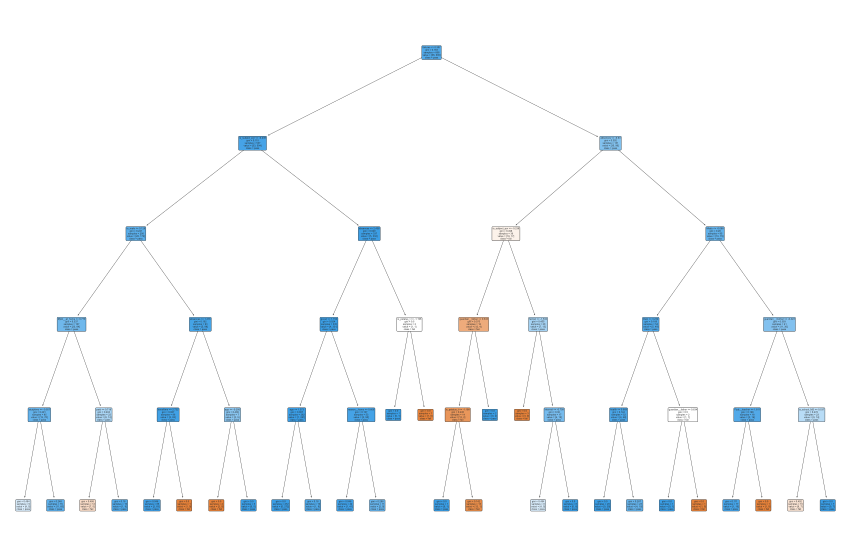

In [272]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(trees[3],
          feature_names=trainData.columns,
          class_names=['fail','pass'], 
          filled=True, impurity=True, 
          rounded=True)

**Правила для принятия решения**

In [273]:
from sklearn.tree import _tree

def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

Правила отсортированы по количеству обучающих выборок, назначенных каждому правилу. Для каждого правила есть информация о предсказанном имени класса и вероятности предсказания.

In [274]:
rules = get_rules(trees[0], trainData.columns, ['fail','pass'])
for r in rules:
    print('**********')
    print(r)

**********
if (failures <= 0.307) and (is_subject_por > -0.238) and (is_school_MS <= 0.537) and (absences <= 2.281) and (higher > -1.385) then class: pass (proba: 100.0%) | based on 218 samples
**********
if (failures <= 0.307) and (is_subject_por > -0.238) and (is_school_MS > 0.537) and (Dalc <= 2.148) and (age <= 1.373) then class: pass (proba: 94.9%) | based on 98 samples
**********
if (failures <= 0.307) and (is_subject_por <= -0.238) and (is_male > 0.129) and (absences <= 1.809) and (traveltime <= 1.348) then class: pass (proba: 97.7%) | based on 87 samples
**********
if (failures <= 0.307) and (is_subject_por <= -0.238) and (is_male <= 0.129) and (Fjob__other > -0.095) and (absences > -0.63) then class: pass (proba: 79.55%) | based on 44 samples
**********
if (failures <= 0.307) and (is_subject_por <= -0.238) and (is_male <= 0.129) and (Fjob__other <= -0.095) and (reason__home <= 0.606) then class: pass (proba: 94.87%) | based on 39 samples
**********
if (failures > 0.307) and (a

* **Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой.** 

In [275]:
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

Scores from each Iteration:  [0.874251497005988, 0.8203592814371258, 0.8622754491017964, 0.8383233532934131, 0.874251497005988]
Average K-Fold Score : 0.8538922155688624


TREE 0:
Accuracy: 0.94258 
Balanced accuracy: 0.70472

              precision    recall  f1-score   support

           0       0.36      0.44      0.40         9
           1       0.97      0.96      0.97       200

    accuracy                           0.94       209
   macro avg       0.67      0.70      0.68       209
weighted avg       0.95      0.94      0.95       209



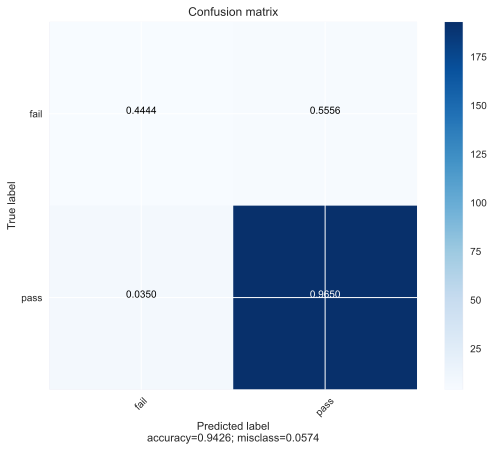

TREE 1:
Accuracy: 0.91388 
Balanced accuracy: 0.53056

              precision    recall  f1-score   support

           0       0.09      0.11      0.10         9
           1       0.96      0.95      0.95       200

    accuracy                           0.91       209
   macro avg       0.53      0.53      0.53       209
weighted avg       0.92      0.91      0.92       209



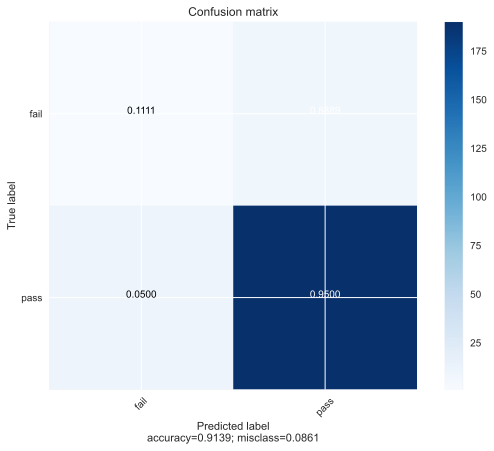

TREE 2:
Accuracy: 0.91866 
Balanced accuracy: 0.63917

              precision    recall  f1-score   support

           0       0.21      0.33      0.26         9
           1       0.97      0.94      0.96       200

    accuracy                           0.92       209
   macro avg       0.59      0.64      0.61       209
weighted avg       0.94      0.92      0.93       209



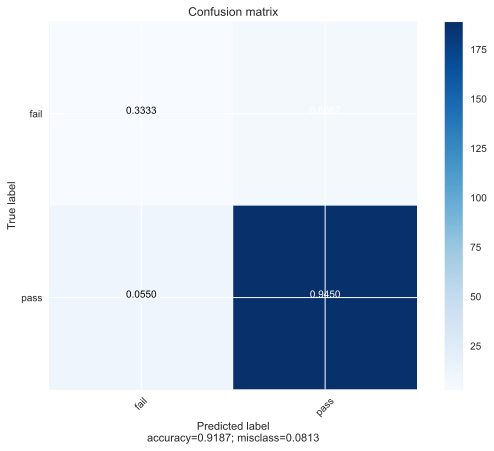

TREE 3:
Accuracy: 0.91388 
Balanced accuracy: 0.4775

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.95      0.95      0.95       200

    accuracy                           0.91       209
   macro avg       0.48      0.48      0.48       209
weighted avg       0.91      0.91      0.91       209



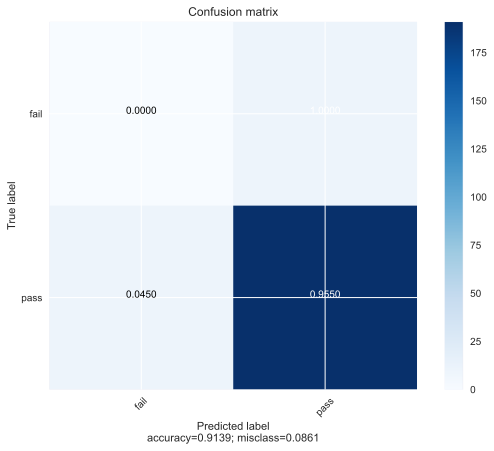

TREE 4:
Accuracy: 0.95215 
Balanced accuracy: 0.65667

              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.97      0.98      0.98       200

    accuracy                           0.95       209
   macro avg       0.70      0.66      0.68       209
weighted avg       0.95      0.95      0.95       209



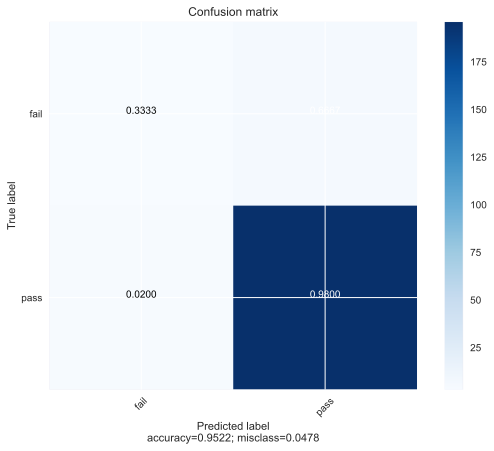

In [276]:
for i in range(5):
    print(f'TREE {i}:')
    get_model_quality(test_label, preds=trees[i].predict(testData))

**Вывод**
* В целом все деревья очень похожи между собой, все они очень хорошо предсказывают "pass" и довольно плохо "fail", вероятнее всего мой классификатор так работает из -за нехватки данных.
* Лучше всего обучилось последнее девево дерево -->  
Accuracy: 0.95    
Balanced accuracy: 0.65    
F1: fail = 0,4/ pass = 0,98

### Задание 2  
  
На кросс-валидации (5-fold из 2 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [278]:
scores = {1: [],
          2: [],
          5: [],
          10: [],
          50: [],
          100: []}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)

for x in scores:
    if x == 1:
        bootstrap = False
    else:
        bootstrap = True
            
    rf_model = RandomForestClassifier(n_estimators=x, bootstrap=bootstrap)
    scores[x] = cross_val_score(rf_model, trainData, train_label, cv=rskf, scoring='f1_micro')

dt_model = DecisionTreeClassifier()
scores[0] = cross_val_score(dt_model, trainData, train_label, cv=rskf, scoring='f1_micro')

scores = pd.DataFrame(scores)
scores.columns = [str(x) + ' estimators' for x in scores.columns]

In [279]:
scores.describe()

,1 estimators,2 estimators,5 estimators,10 estimators,50 estimators,100 estimators,0 estimators
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.823353,0.791617,0.881437,0.888623,0.895808,0.892216,0.838922
std,0.022092,0.037956,0.009277,0.010637,0.007029,0.003992,0.022837
min,0.796407,0.754491,0.868263,0.874251,0.880240,0.886228,0.808383
25%,0.803892,0.763473,0.875749,0.880240,0.892216,0.892216,0.821856
50%,0.826347,0.781437,0.880240,0.892216,0.898204,0.892216,0.838323
75%,0.836826,0.803892,0.890719,0.896707,0.898204,0.892216,0.853293
max,0.862275,0.856287,0.892216,0.904192,0.904192,0.898204,0.880240


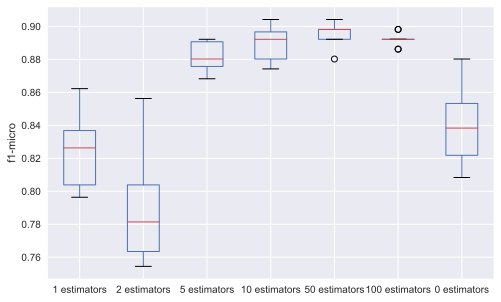

In [280]:
scores.boxplot(figsize=(8,5))
plt.ylabel('f1-micro')
plt.show()

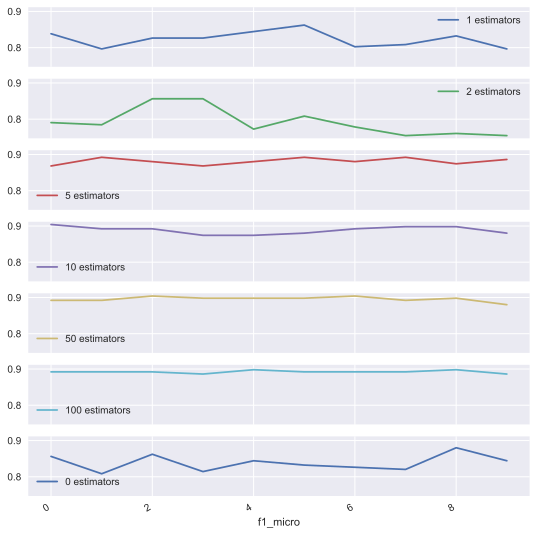

In [281]:
scores.plot(subplots=True, sharey=True, figsize=(9, 10))
plt.xlabel('iteration')
plt.xlabel('f1_micro')
plt.show()

**Вывод**

* Чем больше деревьев используется, тем лучше получаются результаты. Однако улучшение уменьшается по мере увеличения количества деревьев, то есть в определенный момент выгода в производительности прогнозирования от изучения большего количества деревьев будет ниже, чем затраты времени вычислений для изучения этих дополнительных деревьев.

* В моем случае стоит заметить, что в одном эксперименте с одним набором тестов лес из 50 деревьев работает хорошо. Можно увидеть, что на 50 деревьях рост медианы прекращается и начинает снижаться на 100 деревьях.  

* В колонке **0 estimators** включена конфигурация, аналогичная простому дереву решений, как видно из графиков, медиана на ней показывает оценку ниже среднего.

### Задание 3  
  
* **Настройте гиперпараметры модели Random Forest на 5-fold валдиации. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.**

In [290]:
params = [
    # это параметры леса
    {
        'n_estimators': [2, 5, 10, 20, 50, 100],
        'max_depth': range(5,11),
        'min_samples_split': range(2, 11),
        'min_samples_leaf': range(1, 11),
        'max_features': range(2, 19, 2)
    },
    # это параметры дерева
    {
        'n_estimators': [1],
        'bootstrap': [False], 
        'max_depth': range(5,11),
        'min_samples_split': range(2, 11),
        'min_samples_leaf': range(1, 11),
        'max_features': range(2, 19, 2) 
    }
]

In [291]:
rf_model = RandomForestClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True)

clf = GridSearchCV(rf_model, params, cv=skf, scoring='f1_micro', n_jobs=5)

In [195]:
import time

In [196]:
start_time = time.time()

clf.fit(trainData, train_label)

end = time.time() - start_time
end

4591.229375839233

In [197]:
print(f'Время, затраченное на настройку гиперпараметров: {end}')

Время, затраченное на настройку гиперпараметров: 4591.229375839233


In [198]:
clf.best_score_

0.9089820359281438

In [199]:
clf.best_params_

{'max_depth': 5,
 'max_features': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 5}

* **Обучите Random Forest  с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.**

Обучаю Random Forest с настроенными параметрами

In [292]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
rf_model = RandomForestClassifier(n_estimators=5, 
                                  max_depth=5, 
                                  min_samples_leaf=1, 
                                  min_samples_split=7, 
                                  max_features=14)

In [293]:
rf_model.fit(trainData, train_label)

RandomForestClassifier(max_depth=5, max_features=14, min_samples_split=7,
                       n_estimators=5)

In [294]:
preds = rf_model.predict(testData)

**Оценка качества (F1-score) всего ансамбля**

In [295]:
score = cross_val_score(rf_model, trainData, train_label, cv=rskf, scoring='f1_micro')
    
score = pd.Series(score)

In [296]:
score.describe()

count    50.000000
mean      0.894731
std       0.011483
min       0.868263
25%       0.886228
50%       0.895210
75%       0.904192
max       0.928144
dtype: float64

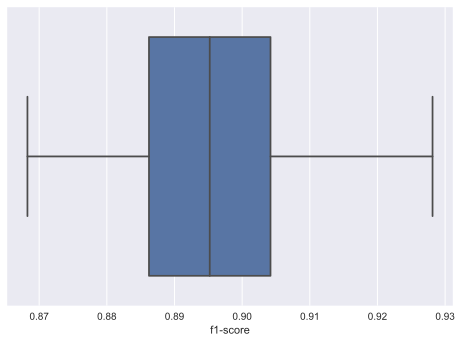

In [297]:
sns.boxplot(score)
plt.xlabel('f1-score')
plt.show()

Accuracy: 0.96172 
Balanced accuracy: 0.98077

              precision    recall  f1-score   support

           0       0.11      1.00      0.20         1
           1       1.00      0.96      0.98       208

    accuracy                           0.96       209
   macro avg       0.56      0.98      0.59       209
weighted avg       1.00      0.96      0.98       209



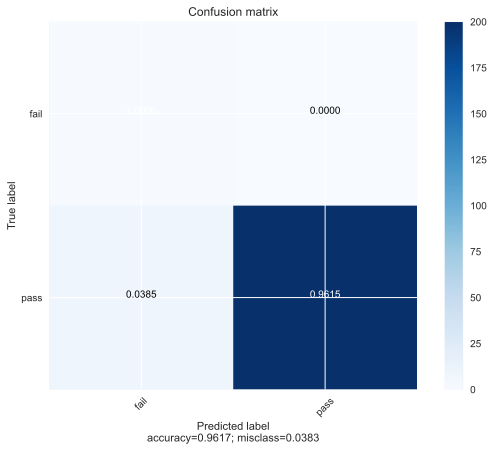

In [298]:
get_model_quality(preds, test_label)

**Вывод для ансамбля**

* Минимальное предсказание ансамбля примерно 0,865;
* Максимальное предсказание ансамбля - около 0,928;
* Основное число в диапазоне 0,895;
* Но при этом сам ансамбль предсказывает примерно 0.96 

**Вывод**
* Простая точность выдает прекрасный результат - 0,96, однако не стоит верить данной оценке на все 100 процентов, поэтому стоит посмотреть на сбалансированную точность.
* Сбалансированная точность пытается учесть дисбаланс в классах и выдает значение - 0,98.
* Мой классификатор отлично выделяет 'pass', но хуже определяет 'fail'. Этот факт также подтверждают метрики, f1-score например выдает fail - 0.2, pass - 0.98.


**Оценка качества (f1-score) каждого дерева решений в лесу**

In [306]:
scores = pd.Series(
    [
        metrics.f1_score(test_label, 
                         x.predict(testData)) for x in rf_model.estimators_
    ]
)

In [307]:
scores.describe()

count    5.000000
mean     0.961309
std      0.004041
min      0.954315
25%      0.962406
50%      0.962406
75%      0.962594
max      0.964824
dtype: float64

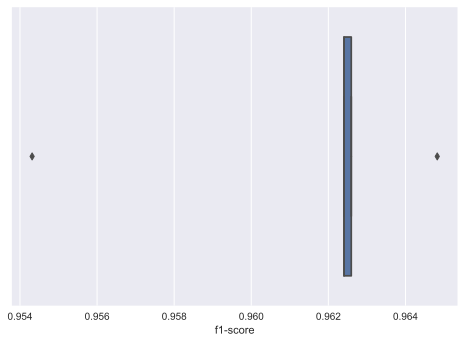

In [308]:
sns.boxplot(scores)
plt.xlabel('f1-score')
plt.show()

Accuracy: 0.96172 
Balanced accuracy: 0.98077

              precision    recall  f1-score   support

           0       0.11      1.00      0.20         1
           1       1.00      0.96      0.98       208

    accuracy                           0.96       209
   macro avg       0.56      0.98      0.59       209
weighted avg       1.00      0.96      0.98       209



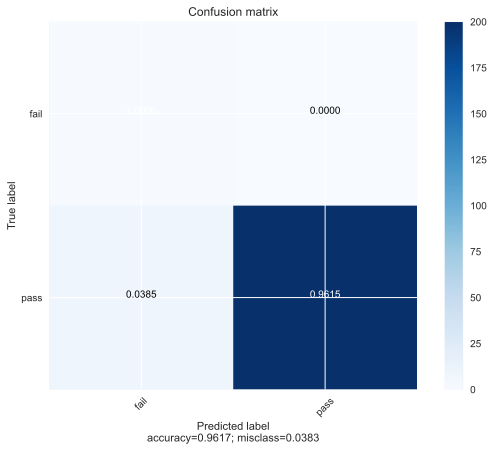

In [305]:
get_model_quality(preds, test_label)

**Вывод для ансамбля**

* Минимальное предсказание ансамбля примерно 0,865;
* Максимальное предсказание ансамбля - около 0,928;
* Основное число в диапазоне 0,895;
* Но при этом сам ансамбль предсказывает примерно 0.96 

**Вывод**
* Простая точность выдает прекрасный результат - 0,96, однако не стоит верить данной оценке на все 100 процентов, поэтому стоит посмотреть на сбалансированную точность.
* Сбалансированная точность пытается учесть дисбаланс в классах и выдает значение - 0,98.
* Мой классификатор отлично выделяет 'pass', но хуже определяет 'fail'. Этот факт также подтверждают метрики, f1-score например выдает fail - 0.2, pass - 0.98.

* **Выведите важность признаков в Random Forest, сделайте выводы.**

In [309]:
rf_model.feature_importances_

array([2.57058135e-02, 1.06986403e-02, 2.17922980e-02, 4.02996834e-02,
       1.80915634e-02, 2.07464721e-01, 0.00000000e+00, 2.29844430e-02,
       0.00000000e+00, 1.24697463e-03, 3.42374128e-02, 2.95246540e-03,
       3.87784273e-03, 3.51564602e-02, 7.88348534e-03, 5.71602725e-02,
       2.25823332e-02, 3.41487160e-02, 1.78642745e-02, 1.17090772e-01,
       2.53518558e-02, 1.87060622e-02, 1.34306186e-01, 3.94822213e-03,
       2.43066718e-02, 4.75120843e-03, 1.90319072e-02, 0.00000000e+00,
       1.78668446e-02, 5.80477521e-03, 2.78687861e-03, 0.00000000e+00,
       0.00000000e+00, 3.03730809e-03, 3.72666531e-03, 0.00000000e+00,
       4.65358989e-05, 2.04194645e-03, 1.89511757e-02, 7.62417860e-03,
       5.52825420e-03, 0.00000000e+00, 2.09451524e-02])

Можно посмотреть какие признаки влияют меньше, а какие больше

In [310]:
pd.Series(rf_model.feature_importances_, 
          index=trainData.columns).sort_values(ascending=False)

failures              0.207465
is_subject_por        0.134306
absences              0.117091
goout                 0.057160
traveltime            0.040300
famrel                0.035156
higher                0.034237
Walc                  0.034149
age                   0.025706
is_male               0.025352
is_famsize_small      0.024307
paid                  0.022984
Dalc                  0.022582
Fedu                  0.021792
guardian__other       0.020945
Mjob__at_home         0.019032
reason__other         0.018951
is_address_U          0.018706
studytime             0.018092
Mjob__other           0.017867
health                0.017864
Medu                  0.010699
freetime              0.007883
reason__reputation    0.007624
Mjob__services        0.005805
guardian__father      0.005528
is_pstatus_t          0.004751
is_school_MS          0.003948
romantic              0.003878
Fjob__services        0.003727
Fjob__other           0.003037
internet              0.002952
Mjob__te

In [311]:
pd.Series(rf_model.feature_importances_, 
          index=trainData.columns).sum()

1.0000000000000002

**Вывод**  
* Вероятно некоторые совсем малозначимые признаки можно выбросить и обучать деревья нез них

Отдельно для каждого дерева, я думаю, будет лучше всего рассмтатреть пру самых  влияющих и наименее влияющих признаков

In [312]:
s = []
for d in rf_model.estimators_:
    s.append(pd.Series(d.feature_importances_, 
                       index=trainData.columns))

Наиболее важные признаки

In [313]:
s_absences = []
for x in s:
    s_absences.append(x['absences'])

In [314]:
s_absences

[0.08580714328746664,
 0.21912400903902712,
 0.09733330628904009,
 0.15402475585851857,
 0.029164643377008782]

In [315]:
np.mean(s_absences)

0.11709077157021223

In [316]:
s_failures = []
for x in s:
    s_failures.append(x['failures'])

In [317]:
s_failures

[0.27360107860034816,
 0.2626032332864738,
 0.1293243059928691,
 0.1590065273232959,
 0.21278846028915674]

In [318]:
np.mean(s_failures)

0.20746472109842876

**Выводы**
* Здесь показано влияие "значимых" признаков в каждом из 5 деревьев и их среднее

Наименее важные признаки

In [319]:
s_romantic = []
for x in s:
    s_romantic.append(x['romantic'])

In [320]:
s_romantic

[0.00817272730210784, 0.0, 0.0, 0.0, 0.011216486341744877]

In [321]:
np.mean(s_romantic)

0.0038778427287705433

In [322]:
s_Fjob__teacher = []
for x in s:
    s_Fjob__teacher.append(x['Fjob__teacher'])

In [323]:
s_Fjob__teacher

[0.0, 0.0, 0.0, 0.0, 0.0]

In [324]:
np.mean(s_Fjob__teacher)

0.0

**Выводы**
* Здесь показано влияие "малозначимых" признаков в каждом из 5 деревьев и их среднее. Видно, что они совсем не оказывают никакого влияния.
* Такие признаки можно исключить из обучения модели.

### Задание 4  
  
* **Примените логистическую регрессию для решения задачи, подберите оптимальные значения гиперпараметров. Оцените качество (roc auc) на 5-fold валидации из 2 повторений.**
* **Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.**
* **Обучите логистическую модель с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество - постройте ROC-кривую, вычислите roc auc. Вычислите аналогичную метрику для Random Forest из Задания 3, сравните точность моделей.**


In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
from sklearn.preprocessing import StandardScaler

In [327]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(bc_data.drop(['is_pass'],
                                axis=1),
                                bc_data['is_pass'],
                                test_size=0.2, 
                                random_state=56428234)

In [328]:
school_scaler = StandardScaler()
trainData = pd.DataFrame(school_scaler.fit_transform(trainData), columns=trainData.columns)
testData = pd.DataFrame(school_scaler.transform(testData), columns=testData.columns)

**Подбор оптимальных гиперпараметров на кросс-валидации**

In [329]:
params = {
    'logisticregression__max_iter': [i for i in range(20, 100)],
    'logisticregression__multi_class': ['auto' , 'multinomial', 'ovr'],
    'logisticregression__n_jobs': [-1,1,5]
}

In [330]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
lr = LogisticRegression()
scaler = StandardScaler()

lrModel = make_pipeline(
    scaler, 
    lr
)

gd = GridSearchCV(lrModel, params, cv=rskf,  scoring='neg_mean_absolute_error', n_jobs=5)

In [331]:
gd.fit(trainData, train_label)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=None),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=5,
             param_grid={'logisticregression__max_iter': [20, 21, 22, 23, 24,
                                                          25, 26, 27, 28, 29,
                                                          30, 31, 32, 33, 34,
                                                          35, 36, 37, 38, 39,
                                                          40, 41, 42, 43, 44,
                                                          45, 46, 47, 48, 49, ...],
                         'logisticregression__multi_class': ['auto',
                                                             'multinomial',
                                                             'ovr'],


In [332]:
gd.best_params_

{'logisticregression__max_iter': 20,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': -1}

**Теперь обучим модель с подобранными параметрами**

In [333]:
lgr = LogisticRegression(max_iter=20, multi_class='auto', n_jobs=-1)
lgr.fit(trainData, train_label)

LogisticRegression(max_iter=20, n_jobs=-1)

In [334]:
np.round(lgr.coef_, 7)

array([[-0.1743695, -0.3092757,  0.1502826,  0.0891225,  0.4338848,
        -0.584826 ,  0.0090037,  0.202939 , -0.0078977, -0.1979433,
         0.1604727,  0.1505552, -0.1656683,  0.1110139,  0.067814 ,
        -0.386458 , -0.1719679,  0.2488393, -0.1117064,  0.3575889,
         0.3654987,  0.1516268,  1.1008142, -0.149021 ,  0.3146935,
        -0.018254 , -0.0577229,  0.3652267, -0.1410776, -0.0377641,
         0.0254852,  0.0172764,  0.0631592, -0.099293 ,  0.105237 ,
        -0.0615805, -0.0137241,  0.0256776, -0.0459184,  0.0244316,
         0.0097166, -0.1261624,  0.2075256]])

In [335]:
preds = lgr.predict(testData)

Accuracy: 0.94737 
Balanced accuracy: 0.54806

              precision    recall  f1-score   support

           0       0.25      0.11      0.15         9
           1       0.96      0.98      0.97       200

    accuracy                           0.95       209
   macro avg       0.61      0.55      0.56       209
weighted avg       0.93      0.95      0.94       209



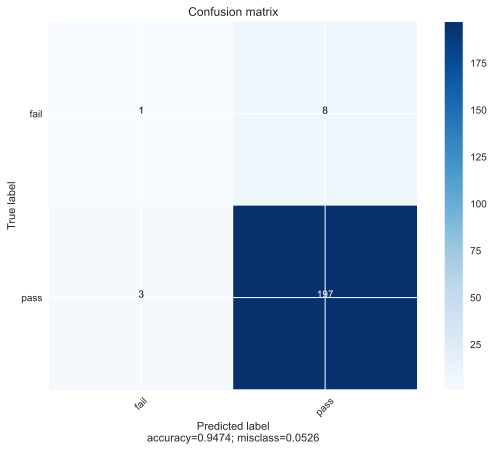

In [336]:
print("Accuracy:",
      round(metrics.accuracy_score(test_label, preds), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(test_label, preds), 5))

print()
print(metrics.classification_report(test_label, preds))

plot_confusion_matrix(cm=metrics.confusion_matrix(test_label, preds),
                      target_names=['fail', 'pass'],
                      normalize=False)

**Вывод**
* Простая точность выдает прекрасный результат - 0,95, однако не стоит верить данной оценке на все 100 процентов, поэтому стоит посмотреть на сбалансированную точность.
* Сбалансированная точность пытается учесть дисбаланс в классах и выдает значение - 0,55, что не очень хорошо.
* Мой классификатор отлично выделяет 'pass', но не 'fail'. Этот факт также подтверждают метрики, f1-score например выдает fail - 0.15, pass - 0.97.

**Оценка качества (roc auc) на 5-fold валидации из 2 повторений**

In [337]:
from sklearn.model_selection import RepeatedStratifiedKFold
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = cross_val_score(lgr, trainData, train_label, cv=rkf, scoring='roc_auc')
print(np.mean(scores))
scores

0.7608561051337456


array([0.7885906 , 0.75018643, 0.76771066, 0.71551081, 0.73613087,
       0.80201342, 0.90865026, 0.7360179 , 0.67188665, 0.73186344])

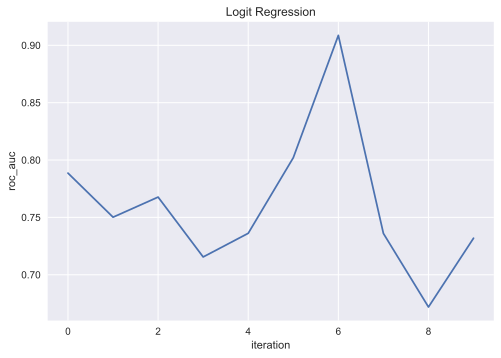

In [338]:
pd.Series(scores).plot()
plt.ylabel('roc_auc')
plt.xlabel('iteration')
plt.title('Logit Regression')
plt.show()

In [81]:
from plot_roc import plot_roc

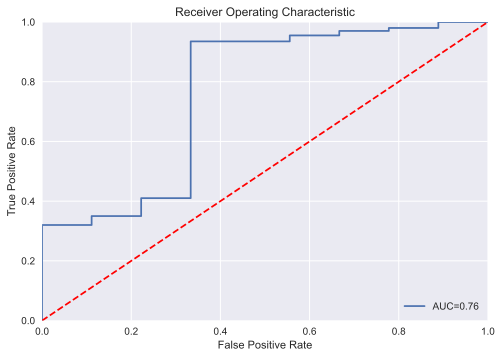

In [341]:
preds_prob = lgr.predict_proba(testData)[:,1]
plot_roc(test_label, preds_prob)

* Показатели метрики *ROC AUC* не такие уж и плохие, равны 0,76. Модель прилично обучилась, но конечно еще далека от 1 данная метрика и модель совершкает ошибки.

* **Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.**


In [342]:
rf_model.fit(trainData, train_label)

RandomForestClassifier(max_depth=5, max_features=14, min_samples_split=7,
                       n_estimators=5)

In [344]:
preds = rf_model.predict(testData)

Accuracy: 0.95215 
Balanced accuracy: 0.55056

              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.96      0.99      0.98       200

    accuracy                           0.95       209
   macro avg       0.65      0.55      0.57       209
weighted avg       0.93      0.95      0.94       209



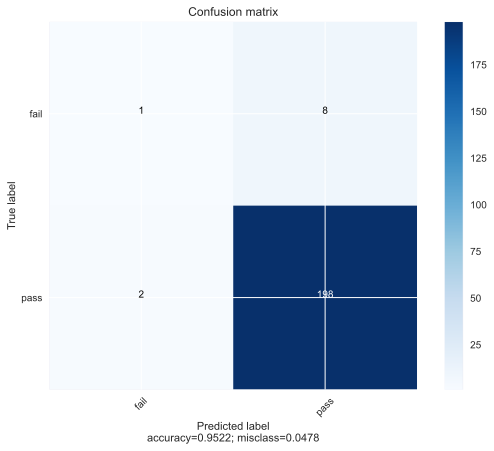

In [345]:
print("Accuracy:",
      round(metrics.accuracy_score(test_label, preds), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(test_label, preds), 5))

print()
print(metrics.classification_report(test_label, preds))

plot_confusion_matrix(cm=metrics.confusion_matrix(test_label, preds),
                      target_names=['fail', 'pass'],
                      normalize=False)

**Вывод**

Простая точность выдает прекрасный результат - 0,95, однако не стоит верить данной оценке на все 100 процентов, поэтому стоит посмотреть на сбалансированную точность.
Сбалансированная точность пытается учесть дисбаланс в классах и выдает значение - 0,55, что не очень хорошо.
Мой классификатор отлично выделяет 'pass', но не 'fail'. Этот факт также подтверждают метрики, f1-score например выдает fail - 0.17, pass - 0.98.


* Сравнивая с логистической регрессией, точности у них совпдают, а вот значения классификатора незначительно отличаются:  
Random Forest --> fail - 0.17, pass - 0.98;  
Logit Regression --> fail - 0.15, pass - 0.97

**Оценка качества (roc auc) на 5-fold валидации из 2 повторений**

In [346]:
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = cross_val_score(rf_model, trainData, train_label, cv=rkf, scoring='roc_auc')
print(np.mean(scores))
scores

0.7700929912604232


array([0.77572707, 0.66871738, 0.83818046, 0.76043997, 0.87908962,
       0.81711409, 0.79101417, 0.78579418, 0.73620433, 0.64864865])

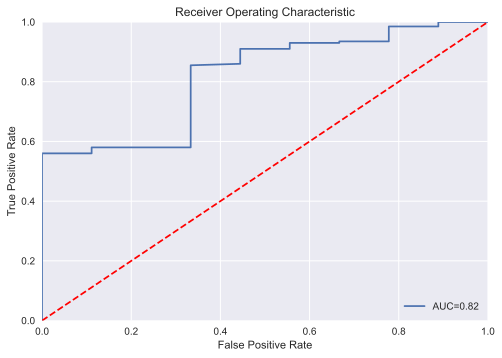

In [347]:
preds_prob = rf_model.predict_proba(testData)[:,1]
plot_roc(test_label, preds_prob)


Показатели метрики ROC AUC не такие уж и плохие, равны 0,82. Модель прилично обучилась, но конечно еще далека от 1 данная метрика и модель совершкает ошибки.
* Сравнивая с логистической регрессией, показатели метрики ROC AUC значительно улучшился:  
Random Forest --> 0,82;  
Logit Regression --> 0,76;  

### Задание 5  
  
* **Используйте для решения задачи один из фреймворков градиентного бустинга: XGBoost, LightGDB или CatBoost.**


In [89]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [349]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(bc_data.drop(['is_pass'],
                                axis=1),
                                bc_data['is_pass'],
                                test_size=0.2, 
                                random_state=56428234)

In [350]:
school_scaler = StandardScaler()
trainData = pd.DataFrame(school_scaler.fit_transform(trainData), columns=trainData.columns)
testData = pd.DataFrame(school_scaler.transform(testData), columns=testData.columns)

* **Оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.**

In [351]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
n_trees = [1] + list(range(10, 151, 10))

In [352]:
np.sum(n_trees) * 0.25

300.25

In [353]:
%%time
xgb_scores = [
    np.mean(
        cross_val_score(xgb.XGBClassifier(n_estimators=x, 
                                          use_label_encoder=False,
                                          n_jobs=6, 
                                          verbosity=0),
                        trainData, 
                        train_label,
                        cv=skf, 
                        scoring='roc_auc')
    ) for x in n_trees
]

Wall time: 24.8 s


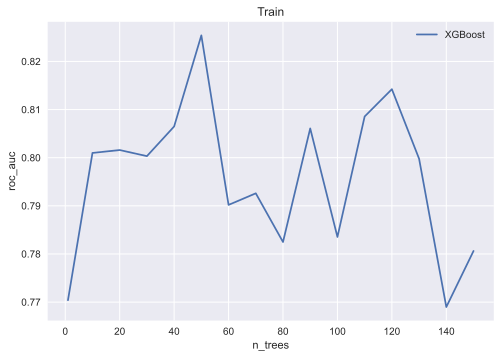

In [354]:
scores = pd.DataFrame({'n_trees':n_trees, 
                       'XGBoost':xgb_scores})

scores.plot(x='n_trees')
plt.title("Train")
plt.ylabel('roc_auc')
plt.show()

**Вывод**  
* Качество модели не стабильно с разным кол-вом деревьев на трэйне.
* Лучше всего качество при 50 деревьях - 0,825
* Хуже всего качество при 140 деверьях - 0,768

In [356]:
%%time
xgb_scores = [
    np.mean(
        cross_val_score(xgb.XGBClassifier(n_estimators=x, 
                                          use_label_encoder=False,
                                          n_jobs=6, 
                                          verbosity=0),
                        testData, 
                        test_label,
                        cv=skf, 
                        scoring='roc_auc')
    ) for x in n_trees
]

Wall time: 10.9 s


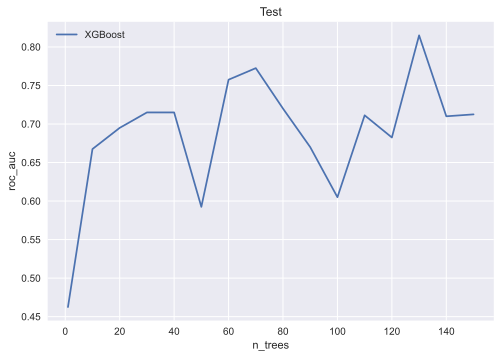

In [357]:
scores = pd.DataFrame({'n_trees':n_trees, 
                       'XGBoost':xgb_scores})

scores.plot(x='n_trees')
plt.title("Test")
plt.ylabel('roc_auc')
plt.show()

**Вывод**  
* На тесте качество модели также не стабильно с разным кол-вом деревьев.
* Лучше всего качество при 130 деревьях - 0,82
* Хуже всего качество при 50 деверьях - 0,59

* **Настройте гиперпараметры модели на 5-fold валидации, в качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.** 

In [358]:
def modelfit(alg, dtrain,train_label, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=train_label.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], train_label,eval_metric='auc')
    
    alg.fit(testData, test_label,eval_metric='auc')
    
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    dtrain_predprob_test = alg.predict_proba(testData)[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(train_label.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(train_label, dtrain_predprob))
    print("AUC Score (Test): %f" % metrics.roc_auc_score(test_label, dtrain_predprob_test))
    
    plt.figure(figsize=(12,10))
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importance', color='g')
    plt.ylabel('Feature Importance Score')
    plt.show()

**Шаг 1.Фиксируем первоначальные значения**  

Чтобы определиться с параметрами повышения, необходимо установить некоторые начальные значения.
Примем следующие значения:

*max_depth = 5:* должно быть от 3 до 10.  
*min_child_weight = 1:* выбрано меньшее значение, потому что конечные узлы могут иметь группы меньшего размера.  
*гамма = 0:* меньшее значение, например 0,1-0,2, также может быть выбрано для запуска. В любом случае это будет изменено позже.
*subample, colsample_bytree = 0.8 :* это обычно используемое начальное значение. Типичные значения находятся в диапазоне 0,5-0,9.
*scale_pos_weight = 1 :* Из-за дисбаланса высокого класса.

Все вышеперечисленное является лишь первоначальной оценкой и будет изменено позже. Беру скорость обучения по умолчанию 0,1 и проверяю оптимальное количество деревьев, используя cv-функцию xgboost. 


Model Report
Accuracy : 0.891
AUC Score (Train): 0.712543
AUC Score (Test): 0.967222


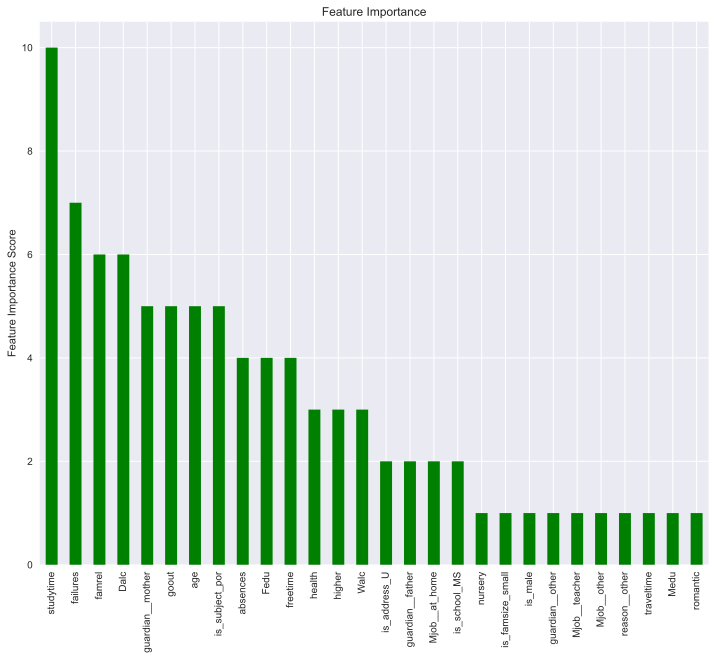

In [359]:
predictors = [x for x in trainData.columns]

xgb1 = XGBClassifier(learning_rate =0.1,
                     n_estimators=1000,
                     max_depth=3,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.5,
                     colsample_bytree=0.5,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)

modelfit(xgb1, trainData, train_label, predictors)

In [360]:
%%time

param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

skf = StratifiedKFold(n_splits=5, shuffle=True)
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=140,
                                                  max_depth=3,
                                                 min_child_weight=1,
                                                 gamma=0,
                                                 subsample=0.5,
                                                 colsample_bytree=0.5,
                                                 objective= 'binary:logistic',
                                                 nthread=4,
                                                 scale_pos_weight=1,
                                                 seed=27), 
                        param_grid =param_test1,
                                    scoring='f1_micro',
                                    n_jobs=4,
                                    cv=skf)

gsearch1.fit(trainData, train_label)

gsearch1.best_params_, gsearch1.best_score_

Wall time: 16.1 s


({'max_depth': 3, 'min_child_weight': 1}, 0.9041916167664672)

* Здесь использовалось 12 комбинаций с более широкими интервалами между значениями.  
* Идеальные значения - 3 для **max_depth** и 1 для **min_child_weight**. 

**Шаг 2. Настройка гаммы**

Настройка значения гаммы производится с параметрами, уже настроенными выше. Гамма может принимать разные значения, но здесь я проверю 5 значений.

In [361]:
%%time

param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

skf = StratifiedKFold(n_splits=5, shuffle=True)

gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=140,
                                                  max_depth=3,
                                                  min_child_weight=1,
                                                  gamma=0,
                                                  subsample=0.5,
                                                  colsample_bytree=0.5,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27), 
                       param_grid = param_test3,
                        scoring='f1_micro',
                        n_jobs=4,
                        
                        cv=skf)

gsearch3.fit(trainData, train_label)

gsearch3.best_params_, gsearch3.best_score_

Wall time: 5.56 s


({'gamma': 0.0}, 0.9005988023952096)

* Значение гаммы - 0.0 является оптимальным. Прежде чем продолжить, стоит повторно откалибровать количество раундов повышения для обновленных параметров.


Model Report
Accuracy : 0.891
AUC Score (Train): 0.712543
AUC Score (Test): 0.967222


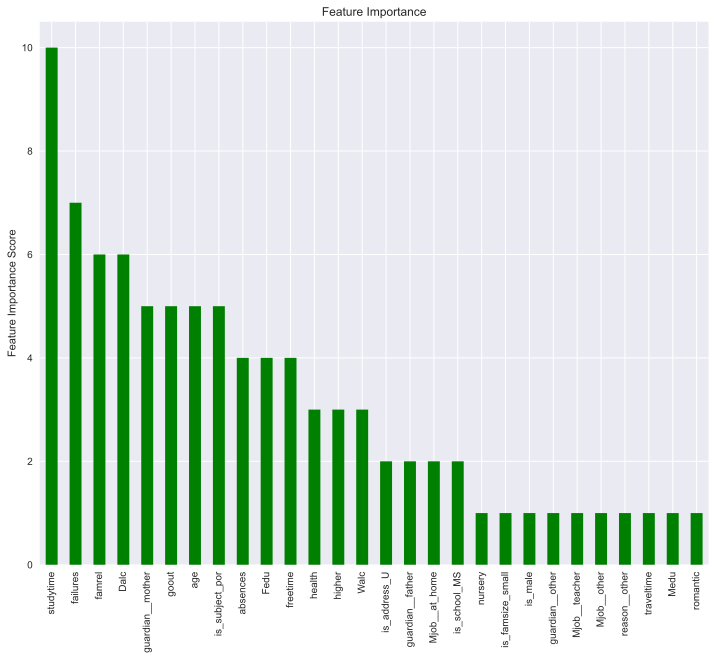

In [362]:
xgb2 = XGBClassifier(
                     learning_rate =0.1,
                     n_estimators=1000,
                     max_depth=3,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.5,
                     colsample_bytree=0.5,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)

modelfit(xgb2, trainData, train_label, predictors)

Результаты не изменились.
Параметры:  

* max_depth: 3
* min_child_weight: 1
* gamma: 0
 

**Шаг 3. Настройка подвыборки и colsample_bytree**

In [363]:
%%time

param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

skf = StratifiedKFold(n_splits=5, shuffle=True)
gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,
                                                  n_estimators=177,
                                                  max_depth=3,
                                                  min_child_weight=1,
                                                  gamma=0,
                                                  subsample=0.5,
                                                  colsample_bytree=0.5,
                                                  objective='binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27), 
                      param_grid = param_test4,
                        scoring='f1_micro',
                        n_jobs=4,
                   
                        cv=skf)

gsearch4.fit(trainData, train_label)

gsearch4.best_params_, gsearch4.best_score_

Wall time: 18.3 s


({'colsample_bytree': 0.7, 'subsample': 0.6}, 0.904191616766467)

Здесь 0,6 - оптимальное значение как для подвыборки, 0.7 - для colsample_bytree. Теперь пробую значения в интервале 0,05 вокруг них.

In [364]:
%%time

param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

skf = StratifiedKFold(n_splits=5, shuffle=True)
gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,
                                                  n_estimators=177,
                                                  max_depth=3,
                                                  min_child_weight=1,
                                                  gamma=0,
                                                  subsample=0.6,
                                                  colsample_bytree=0.7,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27), 
                       param_grid = param_test5,
                                    scoring='f1_micro',
                                    n_jobs=4,
                                    
                                    cv=skf)

gsearch5.fit(trainData, train_label)

gsearch5.best_params_, gsearch5.best_score_

Wall time: 10.2 s


({'colsample_bytree': 0.75, 'subsample': 0.85}, 0.9053892215568862)

Значения получились очень близкими к предыдущим.  
Таким образом, оптимальные значения:  

subsample: 0.85   
colsample_bytree: 0.75

**Шаг 5: настройка параметров регуляризации**  
Следующим шагом является применение регуляризации для уменьшения переобучения. Я настрою здесь значение reg_alpha.

In [365]:
%%time

param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

skf = StratifiedKFold(n_splits=5, shuffle=True)
gsearch6 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=177,
                                                  max_depth=3,
                                                  min_child_weight=1,
                                                  gamma=0,
                                                  subsample=0.85,
                                                  colsample_bytree=0.75,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27), 
                        param_grid =param_test6, 
                                    scoring='f1_micro',
                                    n_jobs=4,
                                  
                                    cv=skf)

gsearch6.fit(trainData, train_label)

gsearch6.best_params_, gsearch6.best_score_

Wall time: 6.04 s


({'reg_alpha': 1e-05}, 0.9005988023952096)

In [366]:
%%time

param_test7 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}

skf = StratifiedKFold(n_splits=5, shuffle=True)
gsearch7 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=177,
                                                  max_depth=3,
                                                  min_child_weight=1,
                                                  gamma=0,
                                                  subsample=0.85,
                                                  colsample_bytree=0.75,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27),  
                         param_grid = param_test7, 
                        scoring='f1_micro',
                        n_jobs=4,
                   
                        cv=skf)

gsearch7.fit(trainData, train_label)

gsearch7.best_params_, gsearch7.best_score_

Wall time: 7.05 s


({'reg_alpha': 0.005}, 0.9041916167664672)

Теперь можно применить эту регуляризацию в модели и посмотреть на влияние:


Model Report
Accuracy : 0.891
AUC Score (Train): 0.730585
AUC Score (Test): 0.946667


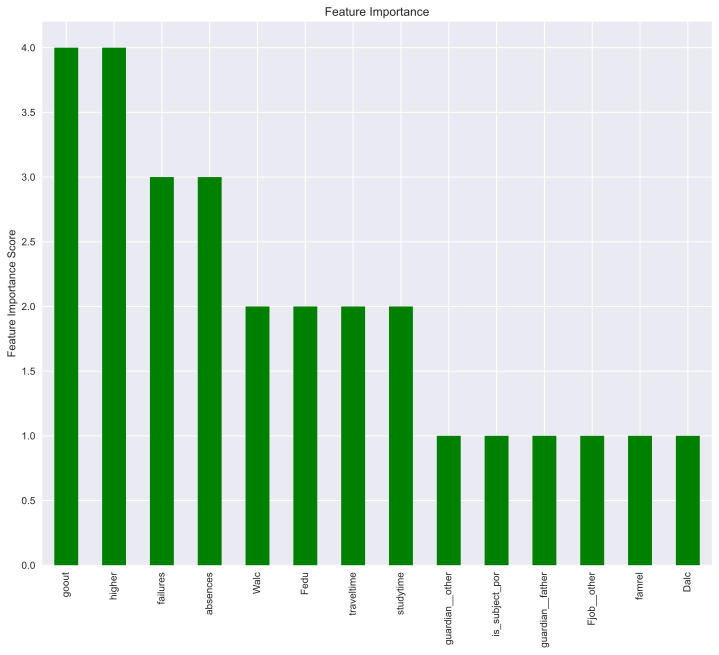

In [367]:
xgb3 = XGBClassifier(learning_rate =0.1,
                     n_estimators=1000,
                     max_depth=3,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.85,
                     colsample_bytree=0.75,
                     reg_alpha=0.005,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)

modelfit(xgb3,trainData, train_label, predictors)

**Вывод**
* Оценка на Train улучшилась.
* Оценка на трейн немного упала.
* Accuracy не изменилась при подборе параметров.
* Значительную роль пи выставлении оценков стали играть такие признаки как:
  - goout
  - higher  
  На втором месте по значимости:  
  - failures
  - absences

 * **Обучите модель с настроенными параметрами на всех данных для моделирования и оцените качество на отложенной выборке. Сравните результаты с другими моделями, дайте комментарий.**

**Шаг 6: снижение скорости обучения**  
Нужно снизить скорость обучения и добавить больше деревьев.


Model Report
Accuracy : 0.891
AUC Score (Train): 0.600157
AUC Score (Test): 0.875278


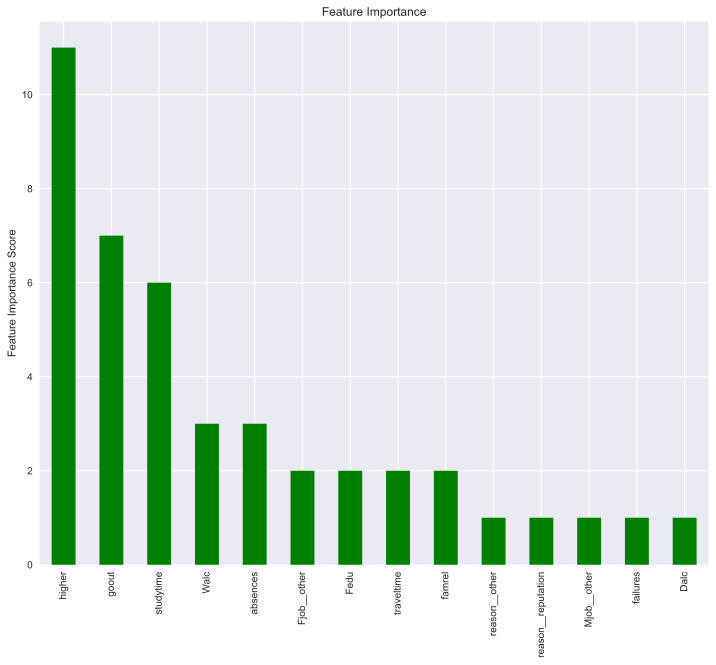

In [368]:
xgb4 = XGBClassifier(learning_rate=0.01,
                     n_estimators=5000,
                     max_depth=3,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.85,
                     colsample_bytree=0.75,
                     reg_alpha=0.005,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)

modelfit(xgb4, trainData, train_label, predictors)

**Вывод**

* Значительный прирост производительности был виден на 1000 деревьях, эффект от настройки параметров более очевиден.
* На 5000 деревьях оценки немного ухудшились.

* Трудно получить очень большой скачок в производительности только с помощью настройки параметров.

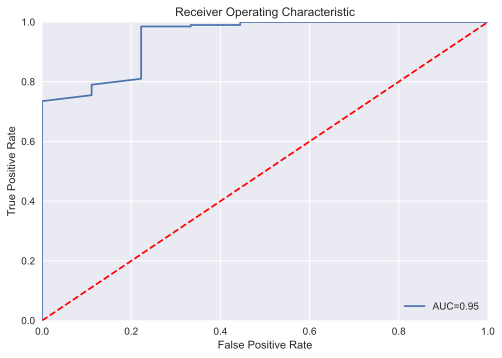

In [370]:
preds_prob = xgb3.predict_proba(testData)[:,1]
plot_roc(test_label, preds_prob)

### Сравнение с другими моделями
* Сравнивая XGBoosting с Логистической регрессией и Random Forest, можно сказать что точность выше всего в  Random Forest и равна 0,95. В бустинге она равна 0,891. Однако на ROC AUC на тестовых данных выше всего в XGBoosting (0,94)
* Можно сказать, что обе модели имеют свои премущетсва и недостатки, но по метрике ROC AUC бустинговая модель прекрасно предсказывает, что видно по графику выше.

##  Часть 4. Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* Для решения задачи примените следующие методы:  
  * KNN  
  * Логистическая регрессия  
  * Деревья решений  
  * Random Forest
  * Gradient Boosting
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, используйте confusion matrix и производные от нее метрики. Сделайте выводы.    

In [52]:
mcc_data = cdata.copy()

In [53]:
def make_4grade(g3):
    if 18 <= g3 <= 20:
        return 5
    elif 14 <= g3 <= 17:
        return 4
    elif 8 <= g3 <= 13:
        return 3
    elif g3 < 8:
        return 2

In [54]:
mcc_data['grade4'] = mcc_data.loc[:, 'G3'].apply(make_4grade)

In [55]:
mcc_data.drop(columns=['G1', 'G2', 'G3'], axis=1, inplace=True)

In [56]:
mcc_data.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'is_male', 'is_address_U', 'is_subject_por', 'is_school_MS',
       'is_famsize_small', 'is_pstatus_t', 'Mjob__at_home', 'Mjob__health',
       'Mjob__other', 'Mjob__services', 'Mjob__teacher', 'Fjob__at_home',
       'Fjob__health', 'Fjob__other', 'Fjob__services', 'Fjob__teacher',
       'reason__course', 'reason__home', 'reason__other', 'reason__reputation',
       'guardian__father', 'guardian__mother', 'guardian__other', 'grade4'],
      dtype='object')

## KNN

In [57]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(mcc_data.drop(['grade4'],
                                axis=1),
                                mcc_data['grade4'],
                                test_size=0.2, 
                                random_state=56428234)

**Стандартизация**

In [60]:
school_scaler = StandardScaler()
trainData = pd.DataFrame(school_scaler.fit_transform(trainData), columns=trainData.columns)
testData = pd.DataFrame(school_scaler.transform(testData), columns=testData.columns)

**Подбор оптимальных гиперпараметров на кросс-валидации**

In [61]:
params = {
    'kneighborsclassifier__n_neighbors': [i for i in range(3, 51)], 
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__n_jobs': [-1,1,5],
    'kneighborsclassifier__metric': ['euclidean', 'minkowski', 'manhattan'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [67]:
kf = KFold(n_splits=5, shuffle=True)
knn = KNeighborsClassifier()
scaler = StandardScaler()

knrModel = make_pipeline(
    scaler, 
    knn
)

gd = GridSearchCV(knrModel,
                  params,
                  cv=kf, 
                  scoring='f1_macro', 
                  n_jobs=-1)

In [68]:
gd.fit(trainData, train_label)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__algorithm': ['auto',
                                                             'ball_tree',
                                                             'kd_tree',
                                                             'brute'],
                         'kneighborsclassifier__metric': ['euclidean',
                                                          'minkowski',
                                                          'manhattan'],
                         'kneighborsclassifier__n_jobs': [-1, 1, 5],
                         'kneighborsclassifier__n_neighbors': [3, 4, 5, 6, 7, 8,
                                                  

In [69]:
gd.best_params_

{'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__metric': 'manhattan',
 'kneighborsclassifier__n_jobs': -1,
 'kneighborsclassifier__n_neighbors': 3,
 'kneighborsclassifier__weights': 'distance'}

**Теперь обучим модель с подобранными параметрами**

In [70]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='distance', n_jobs=-1, algorithm='auto')
knn.fit(trainData, train_label)

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=3,
                     weights='distance')

In [71]:
preds = knn.predict(testData)

**Оценка**

In [72]:
print("Accuracy:",
      round(metrics.accuracy_score(test_label, preds), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(test_label, preds), 5), 
     '\nMulticlass f1-score:',
     '\n    micro:', round(metrics.f1_score(test_label, preds, average='micro'), 5),
     '\n    macro:', round(metrics.f1_score(test_label, preds, average='macro'), 5),
     '\n    weighted:', round(metrics.f1_score(test_label, preds, average='weighted'), 5))

print('\n\nClassification report:\n')
print(metrics.classification_report(test_label, preds, digits=5))

Accuracy: 0.56938 
Balanced accuracy: 0.33304 
Multiclass f1-score: 
    micro: 0.56938 
    macro: 0.33815 
    weighted: 0.5745


Classification report:

              precision    recall  f1-score   support

           2    0.05263   0.11111   0.07143         9
           3    0.70992   0.70992   0.70992       131
           4    0.43636   0.40000   0.41739        60
           5    0.25000   0.11111   0.15385         9

    accuracy                        0.56938       209
   macro avg    0.36223   0.33304   0.33815       209
weighted avg    0.58328   0.56938   0.57450       209



In [73]:
classes_names = ['Отлично', 'Хорошо', 'Удовлетворительно', 'Неудовлетворительно']
num_classes = train_label.nunique()
num_classes

4

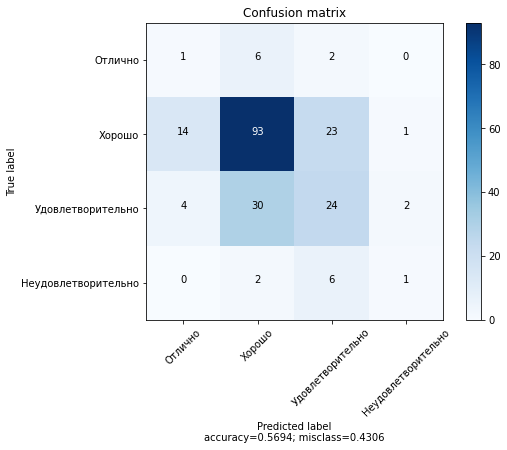

In [76]:

plot_confusion_matrix(cm=metrics.confusion_matrix(test_label, preds),
                      target_names=classes_names,
                      normalize=False)

In [77]:
preds_prob = knn.predict_proba(testData)

In [78]:
print('ROC AUC:',
     '\n    macro:', round(metrics.roc_auc_score(test_label, preds_prob, multi_class='ovr', average='macro'), 5),
     '\n    weighted:', round(metrics.roc_auc_score(test_label, preds_prob, multi_class='ovr', average='weighted'), 5))


ROC AUC: 
    macro: 0.6515 
    weighted: 0.67292


**Вывод**
* Простая точность выдает результат - 0,57, однако не стоит верить данной оценке на все 100 процентов, поэтому стоит посмотреть на сбалансированную точность.
* Сбалансированная точность пытается учесть дисбаланс в классах и выдает значение - 0,3.
* Мой классификатор отлично находит 'удовлетворительно', по остальным классам он уступает. Так происходит из-за маленького саппорта на данном разбиении по остальным классам.

## Логистическая регрессия 

**Подбор оптимальных гиперпараметров на кросс-валидации**

In [99]:
params = {
    'logisticregression__C': np.linspace(1e-3,1,100),
    'logisticregression__multi_class': ['ovr'],
    'logisticregression__tol':  np.linspace(1e-4,1,8),
}

In [100]:
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=17)
lr = LogisticRegression(random_state=17, class_weight = 'balanced')
scaler = StandardScaler()

lrModel = make_pipeline(
    scaler, 
    lr
)

gd = GridSearchCV(lrModel,
                  params,
                  cv=skf, 
                  scoring='f1_macro', 
                  n_jobs=-1)

In [101]:
gd.fit(trainData, train_label)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=17))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.071...
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
                         'logisticregression__multi_class': ['ovr'],
                         'logisticregression__tol': array([1.00000000e-04, 1.42942857e-01, 2.85785714e-01, 4.28628571e-01,
       5.71471429e-01, 7.14314286e-01, 8.5715

In [102]:
gd.best_params_

{'logisticregression__C': 0.16245454545454546,
 'logisticregression__multi_class': 'ovr',
 'logisticregression__tol': 0.0001}

**Теперь обучим модель с подобранными параметрами**

In [103]:
lgr = LogisticRegression(random_state=17, class_weight = 'balanced', multi_class='ovr', n_jobs=-1, C=0.16245454545454546,
 tol=0.0001)
lgr.fit(trainData, train_label)

LogisticRegression(C=0.16245454545454546, class_weight='balanced',
                   multi_class='ovr', n_jobs=-1, random_state=17)

In [104]:
%%time

preds = lgr.predict(testData)

Wall time: 2 ms


In [105]:
print("Accuracy:",
      round(metrics.accuracy_score(test_label, preds), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(test_label, preds), 5), 
     '\nMulticlass f1-score:',
     '\n    micro:', round(metrics.f1_score(test_label, preds, average='micro'), 5),
     '\n    macro:', round(metrics.f1_score(test_label, preds, average='macro'), 5),
     '\n    weighted:', round(metrics.f1_score(test_label, preds, average='weighted'), 5))

print('\n\nClassification report:\n')
print(metrics.classification_report(test_label, preds, digits=5))

Accuracy: 0.51675 
Balanced accuracy: 0.465 
Multiclass f1-score: 
    micro: 0.51675 
    macro: 0.37463 
    weighted: 0.54711


Classification report:

              precision    recall  f1-score   support

           2    0.20000   0.66667   0.30769         9
           3    0.75490   0.58779   0.66094       131
           4    0.41071   0.38333   0.39655        60
           5    0.09524   0.22222   0.13333         9

    accuracy                        0.51675       209
   macro avg    0.36521   0.46500   0.37463       209
weighted avg    0.60379   0.51675   0.54711       209



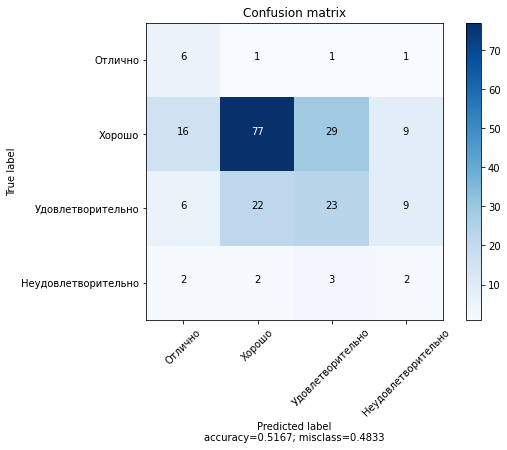

In [106]:
plot_confusion_matrix(cm=metrics.confusion_matrix(test_label, preds),
                      target_names=classes_names,
                      normalize=False)

In [107]:
preds_prob = lgr.predict_proba(testData)

In [108]:
print('ROC AUC:',
     '\n    macro:', round(metrics.roc_auc_score(test_label, preds_prob, multi_class='ovr', average='macro'), 5),
     '\n    weighted:', round(metrics.roc_auc_score(test_label, preds_prob, multi_class='ovr', average='weighted'), 5))

ROC AUC: 
    macro: 0.67533 
    weighted: 0.67589


**Вывод**
* Простая точность выдает результат - 0,52, уменьшилась по сравнению с KNN, однако не стоит верить данной оценке на все 100 процентов, поэтому стоит посмотреть на сбалансированную точность.
* Сбалансированная точность пытается учесть дисбаланс в классах и выдает значение - 0,47, увеличилась по сравнению с KNN.
* Мой классификатор отлично находит 'удовлетворительно', по остальным классам он уступает. Так происходит из-за маленького саппорта на данном разбиении по остальным классам.

## Random Forest

In [124]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(mcc_data.drop(['grade4'],
                                axis=1),
                                mcc_data['grade4'],
                                test_size=0.2, 
                                random_state=56428234)

**Стандартизация**

In [125]:
school_scaler = StandardScaler()
trainData = pd.DataFrame(school_scaler.fit_transform(trainData), columns=trainData.columns)
testData = pd.DataFrame(school_scaler.transform(testData), columns=testData.columns)

**Подбор оптимальных гиперпараметров на кросс-валидации**

In [126]:
params = [
    # это параметры леса
    {
        'n_estimators': [2, 5, 10, 20, 50, 100],
        'max_depth': range(5,11),
        'min_samples_split': range(2, 11),
        'min_samples_leaf': range(1, 11),
        'max_features': range(2, 19, 2)
    },
    # это параметры дерева
    {
        'n_estimators': [1],
        'bootstrap': [False], 
        'max_depth': range(5,11),
        'min_samples_split': range(2, 11),
        'min_samples_leaf': range(1, 11),#
        'max_features': range(2, 19, 2) 
    }
]

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
from sklearn.model_selection import StratifiedKFold
rf_model = RandomForestClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True)

clf = GridSearchCV(rf_model, params, cv=skf, scoring='f1_macro', n_jobs=5)


In [129]:
clf.fit(trainData, train_label)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=5,
             param_grid=[{'max_depth': range(5, 11),
                          'max_features': range(2, 19, 2),
                          'min_samples_leaf': range(1, 11),
                          'min_samples_split': range(2, 11),
                          'n_estimators': [2, 5, 10, 20, 50, 100]},
                         {'bootstrap': [False], 'max_depth': range(5, 11),
                          'max_features': range(2, 19, 2),
                          'min_samples_leaf': range(1, 11),
                          'min_samples_split': range(2, 11),
                          'n_estimators': [1]}],
             scoring='f1_macro')

In [130]:
clf.best_params_

{'max_depth': 8,
 'max_features': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 10}

**Теперь обучим модель с подобранными параметрами**

In [131]:
from sklearn.model_selection import RepeatedStratifiedKFold
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
rf_model = RandomForestClassifier(n_estimators=10, 
                                  max_depth=8, 
                                  min_samples_leaf=1, 
                                  min_samples_split=3, 
                                  max_features=12)

scores = pd.Series(cross_val_score(rf_model, trainData, train_label, cv=rskf, n_jobs=5))

In [132]:
scores.describe()

count    50.000000
mean      0.648743
std       0.023694
min       0.592814
25%       0.628743
50%       0.652695
75%       0.670659
max       0.682635
dtype: float64

In [133]:
rf_model.fit(trainData, train_label)

RandomForestClassifier(max_depth=8, max_features=12, min_samples_split=3,
                       n_estimators=10)

In [134]:
preds = rf_model.predict(testData)

In [135]:
print("Accuracy:",
      round(metrics.accuracy_score(test_label, preds), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(test_label, preds), 5), 
     '\nMulticlass f1-score:',
     '\n    micro:', round(metrics.f1_score(test_label, preds, average='micro'), 5),
     '\n    macro:', round(metrics.f1_score(test_label, preds, average='macro'), 5),
     '\n    weighted:', round(metrics.f1_score(test_label, preds, average='weighted'), 5))

print('\n\nClassification report:\n')
print(metrics.classification_report(test_label, preds, digits=5))

Accuracy: 0.64593 
Balanced accuracy: 0.37815 
Multiclass f1-score: 
    micro: 0.64593 
    macro: 0.39398 
    weighted: 0.60721


Classification report:

              precision    recall  f1-score   support

           2    0.60000   0.33333   0.42857         9
           3    0.68485   0.86260   0.76351       131
           4    0.48718   0.31667   0.38384        60
           5    0.00000   0.00000   0.00000         9

    accuracy                        0.64593       209
   macro avg    0.44301   0.37815   0.39398       209
weighted avg    0.59496   0.64593   0.60721       209



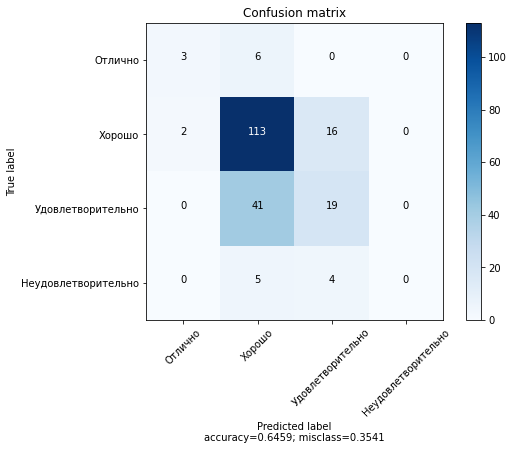

In [136]:
plot_confusion_matrix(cm=metrics.confusion_matrix(test_label, preds),
                      target_names=classes_names,
                      normalize=False)

In [137]:
preds_prob = lgr.predict_proba(testData)

In [138]:
print('ROC AUC:',
     '\n    macro:', round(metrics.roc_auc_score(test_label, preds_prob, multi_class='ovr', average='macro'), 5),
     '\n    weighted:', round(metrics.roc_auc_score(test_label, preds_prob, multi_class='ovr', average='weighted'), 5))

ROC AUC: 
    macro: 0.67533 
    weighted: 0.67589


**Вывод**
* Простая точность выдает результат - 0,65, точность сильно увеличилась по сравнению с 2мя предыдущими метриками, однако не стоит верить данной оценке на все 100 процентов, поэтому стоит посмотреть на сбалансированную точность.
* Сбалансированная точность пытается учесть дисбаланс в классах и выдает значение - 0,38.
* Мой классификатор отлично находит 'удовлетворительно', по остальным классам он уступает. Так происходит из-за маленького саппорта на данном разбиении по остальным классам.

## Gradient Boosting

**Подбор оптимальных гиперпараметров на кросс-валидации**

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
params = {
    'gradientboostingclassifier__n_estimators': [10,25, 40, 50, 100],
    'gradientboostingclassifier__max_depth': [1, 5, 10, 25, 50],
    'gradientboostingclassifier__loss': ['deviance', 'exponential']
}

In [113]:
kf = KFold(n_splits=5, shuffle=True)
gb = GradientBoostingClassifier()
scaler = StandardScaler()

gbModel = make_pipeline(
    scaler, 
    gb
)

gd = GridSearchCV(gbModel,
                  params,
                  cv=kf, 
                  scoring='f1_macro', 
                  n_jobs=-1)

In [114]:
gd.fit(trainData, train_label)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__loss': ['deviance',
                                                              'exponential'],
                         'gradientboostingclassifier__max_depth': [1, 5, 10, 25,
                                                                   50],
                         'gradientboostingclassifier__n_estimators': [10, 25,
                                                                      40, 50,
                                                                      100]},
             scoring='f1_macro')

In [115]:
gd.best_params_

{'gradientboostingclassifier__loss': 'deviance',
 'gradientboostingclassifier__max_depth': 10,
 'gradientboostingclassifier__n_estimators': 40}

**Теперь обучим модель с подобранными параметрами**

In [116]:
gb_model = GradientBoostingClassifier(loss='deviance',
                                        max_depth=10,
                                        n_estimators=40)
gb_model.fit(trainData, train_label)

GradientBoostingClassifier(max_depth=10, n_estimators=40)

In [117]:
preds = gb_model.predict(testData)

In [118]:
print("Accuracy:",
      round(metrics.accuracy_score(test_label, preds), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(test_label, preds), 5), 
     '\nMulticlass f1-score:',
     '\n    micro:', round(metrics.f1_score(test_label, preds, average='micro'), 5),
     '\n    macro:', round(metrics.f1_score(test_label, preds, average='macro'), 5),
     '\n    weighted:', round(metrics.f1_score(test_label, preds, average='weighted'), 5))

print('\n\nClassification report:\n')
print(metrics.classification_report(test_label, preds, digits=5))

Accuracy: 0.61722 
Balanced accuracy: 0.3476 
Multiclass f1-score: 
    micro: 0.61722 
    macro: 0.36204 
    weighted: 0.59778


Classification report:

              precision    recall  f1-score   support

           2    0.10000   0.11111   0.10526         9
           3    0.69079   0.80153   0.74205       131
           4    0.48889   0.36667   0.41905        60
           5    0.50000   0.11111   0.18182         9

    accuracy                        0.61722       209
   macro avg    0.44492   0.34760   0.36204       209
weighted avg    0.59917   0.61722   0.59778       209



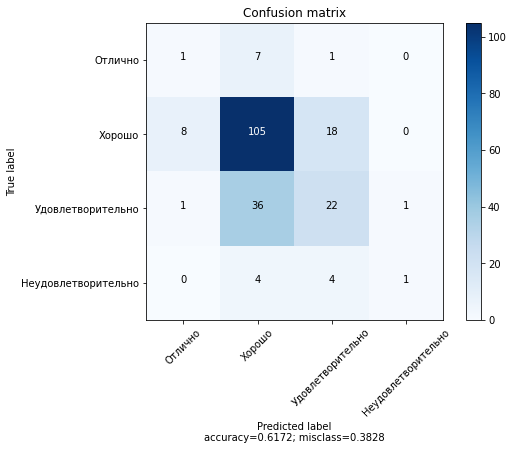

In [119]:
plot_confusion_matrix(cm=metrics.confusion_matrix(test_label, preds),
                      target_names=classes_names,
                      normalize=False)

In [120]:
preds_prob = gb_model.predict_proba(testData)

print('ROC AUC:',
     '\n    macro:', round(metrics.roc_auc_score(test_label, preds_prob, multi_class='ovr', average='macro'), 5),
     '\n    weighted:', round(metrics.roc_auc_score(test_label, preds_prob, multi_class='ovr', average='weighted'), 5))


ROC AUC: 
    macro: 0.69475 
    weighted: 0.69468


**Вывод**
* Значения стали немного похуже, чем в Random forest.
* Простая точность выдает результат - 0,62, однако не стоит верить данной оценке на все 100 процентов, поэтому стоит посмотреть на сбалансированную точность.
* Сбалансированная точность пытается учесть дисбаланс в классах и выдает значение - 0,35.
* Мой классификатор отлично находит 'удовлетворительно', по остальным классам он уступает. Так происходит из-за маленького саппорта на данном разбиении по остальным классам.

**Общий вывод**  
* Лучше всего для предсказания 4х балльной оценки отработал Random Forest:  
    - Accuracy: 0.64593  
    - Balanced accuracy: 0.37815  
    - Multiclass f1-score:  
            micro: 0.64593  
            macro: 0.39398   
            weighted: 0.60721  
* Однако ему совершенно не удалось предсказание класса "5":  

                f1-score   support  

           2    0.42857         9  
           3    0.76351       131  
           4    0.38384        60  
           5    0.00000         9  
* Вероятнее всего, лучшим решением будет попробовать другое разбиение и более тонкую настройку гиперпараметров, для улучшения результата.
